# Q1. What is Apache Spark ? Explain the architecture of Apache Spark. How does Spark work internally?

Apache Spark is a powerful open-source analytics engine for large-scale data processing, known for its speed, ease of use, and versatility in handling diverse types of data. It provides APIs for Java, Scala, Python, and R and is widely used for data processing, machine learning, and stream processing in big data applications.

Here's a breakdown of Spark, its architecture, and how it works internally, detailed to support an experienced understanding.

1. Overview of Apache Spark

Apache Spark offers a unified engine for executing both batch and streaming data processing jobs on large datasets. Its primary advantages over traditional processing engines (like Hadoop MapReduce) include:

Speed: Spark's in-memory computation and Directed Acyclic Graph (DAG)-based execution make it up to 100x faster than Hadoop.

Ease of Use: It has high-level APIs and support for SQL, machine learning (MLlib), streaming, and graph data processing.

Flexibility: Spark can run on a standalone cluster, Hadoop, Kubernetes, or in the cloud, supporting multiple formats (e.g., JSON, Parquet, ORC) and sources (e.g., HDFS, S3, JDBC, Kafka).

2. Apache Spark Architecture:

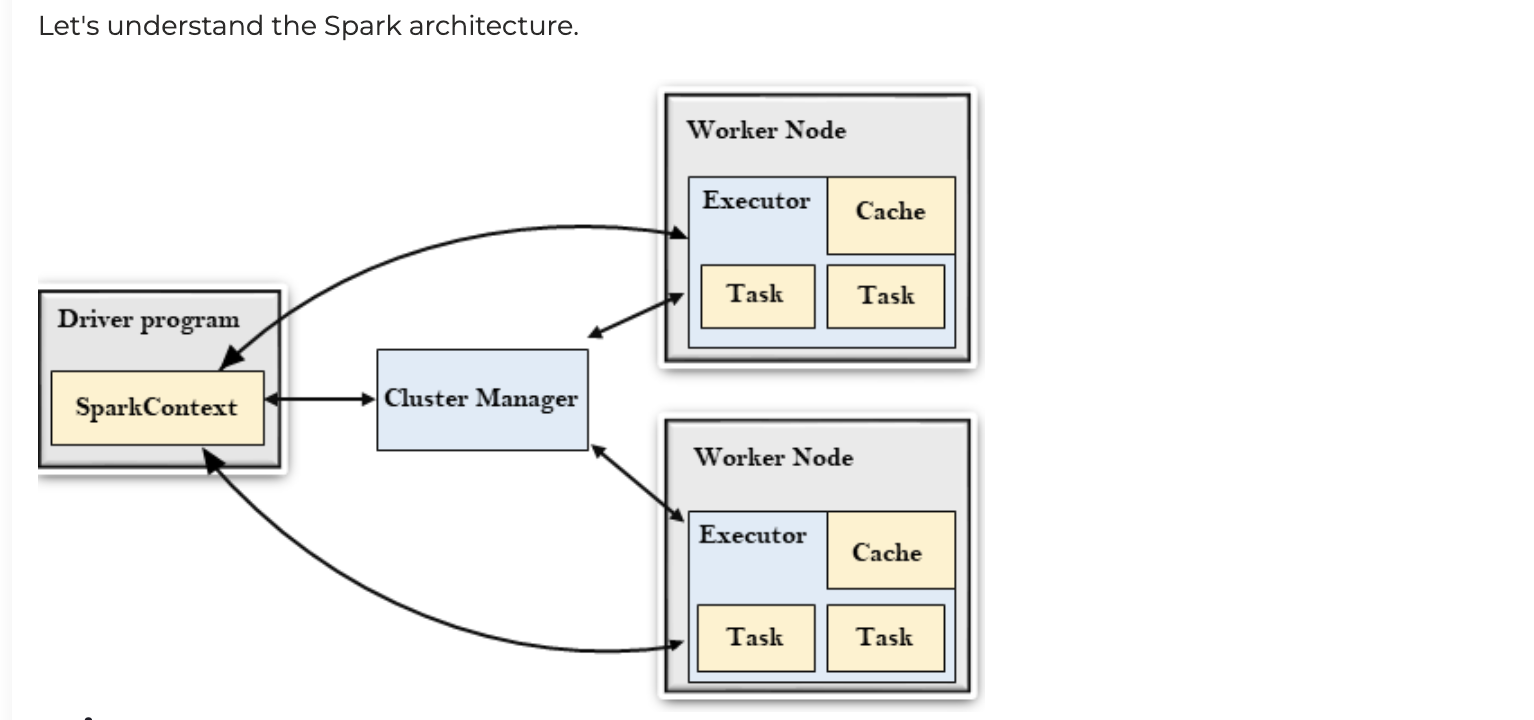

Apache Spark’s architecture is based on a master-slave framework with the following core components:

a. Driver Program:

The Driver is the main control process that defines and schedules the application in Spark.
It converts user code (usually written in high-level APIs like PySpark, Scala, or SQL) into a Directed Acyclic Graph (DAG) of stages, each representing a sequence of transformations on data.
The Driver is responsible for coordinating and distributing tasks across the cluster.

b. Cluster Manager

The Cluster Manager manages the allocation of resources to the Driver and Executor processes in a Spark application. Spark supports various cluster managers, including:

   - Standalone (native Spark cluster)
   - YARN (common in Hadoop ecosystems)
   - Apache Mesos
   - Kubernetes

c. Executors

Executors are the distributed processes running across the worker nodes in the cluster, responsible for executing individual tasks assigned by the Driver.

Each Executor holds:
   
   - Cache Storage: To store intermediate data for in-memory processing, reducing recomputation costs.
   - Task Execution Environment: Runs the assigned tasks and sends results back to the Driver.

d. Task

A Task is a single unit of work sent by the Driver to an Executor. Spark divides each stage into tasks based on partitions and runs these tasks concurrently across Executors.

3. Apache Spark Internal Working (Execution Flow):

When you submit a Spark application, it undergoes a series of steps from parsing the code to actual data processing. Here’s a step-by-step explanation:

Step 1: User Code Submission:

The user code (using Spark API) defines a SparkContext or SparkSession (in newer versions) that initializes the Driver program and connects with the cluster manager.

Step 2: RDD (Resilient Distributed Dataset) Creation and DAG Formation

   - Spark divides data into Resilient Distributed Datasets (RDDs), which are fault-tolerant, partitioned collections of elements that can be operated on in parallel.

   - Transformations (e.g., map, filter) are applied lazily on RDDs, meaning they are not executed immediately but are instead recorded as metadata describing a DAG of stages.

Step 3: DAG Scheduler

   - The DAG scheduler splits the execution graph into stages based on wide (requiring shuffles) and narrow transformations.
It breaks the DAG into a sequence of stages, each containing a set of tasks. Stages are executed in a pipelined fashion when possible.

Step 4: Task Scheduling and Execution

   - The Task Scheduler submits tasks to Executors based on data locality to optimize performance.
Executors receive and execute tasks, storing intermediate results if required, and caching RDDs when persist() or cache() is called.

Step 5: Shuffle Process

   - Shuffling is necessary for transformations like groupByKey and reduceByKey that require data movement between partitions.
   - Spark performs shuffles by writing data to disk and reading it back, as this minimizes network I/O.

Step 6: Execution and Result Return

   - Once all tasks in a stage complete, results are returned to the Driver or written to an output sink like HDFS, S3, or a database.

4. Apache Spark’s Core Components and Libraries

Spark’s ecosystem provides a suite of libraries for different processing requirements:

   - Spark SQL: For structured data processing with SQL support. It provides a DataFrame API to simplify manipulation and transformation.
   - Spark Streaming: For processing real-time data streams, supporting micro-batch and continuous processing modes.
   - MLlib: Spark's machine learning library, offering scalable ML algorithms like clustering, regression, and classification.
   - GraphX: For graph processing, useful in cases like social network analysis.

5. Detailed Execution Plan and Optimization in Apache Spark:

Spark provides mechanisms to optimize execution and manage resources effectively:

a. Catalyst Optimizer

   - Spark SQL’s Catalyst Optimizer parses SQL queries and performs logical and physical planning to optimize execution.
It performs optimizations like predicate pushdown, constant folding, and project pruning, which improve query performance.

b. Tungsten Execution Engine

   - Tungsten improves memory management, code generation, and cache utilization.
   - It uses bytecode generation and off-heap memory to reduce garbage collection and improve execution speed.

c. Lazy Evaluation and Fault Tolerance:

   - Lazy evaluation ensures Spark doesn’t execute operations until necessary (e.g., upon an action like collect or count).
   - Fault tolerance is managed by RDDs, which can recompute lost partitions using lineage information if data is lost during execution.

6. Apache Spark Job Execution Workflow (Example):

Consider the following Spark workflow for a job with three stages:

Stage 1 (Transformation Stage):

A set of narrow transformations (e.g., map) is applied in parallel across partitions. These operations are cheap and do not trigger a shuffle.

Stage 2 (Shuffle Stage):

Wide transformations (e.g., reduceByKey) lead to shuffling, where Spark redistributes data across partitions to ensure all key-value pairs with the same key are co-located on the same executor.

Shuffles introduce more complexity, as data is often stored on disk and then read by downstream tasks, increasing execution time.


Stage 3 (Action Stage):

Actions like count or collect trigger final computations and return results to the Driver. This final stage gathers and consolidates results across partitions.

7. Optimizing Spark Jobs

To achieve optimal performance, Spark jobs can be optimized using:

   - Partition tuning: Increasing partitions for parallelism or adjusting based on data volume to avoid small partition issues.

   - Broadcast joins: Avoiding shuffles by broadcasting small tables for joining with larger tables.

   - Caching: Using in-memory caching of RDDs or DataFrames to speed up repeated access.

   - Skew mitigation: Redistributing heavily skewed keys or using partitioning techniques for balanced execution.


Conclusion:

Apache Spark’s architecture is designed to handle massive data processing efficiently by leveraging in-memory computation, lazy evaluation, and flexible APIs across various data types. Understanding how Spark manages tasks, stages, and transformations on distributed data helps optimize job execution, reduce shuffle costs, and achieve low-latency processing for both batch and streaming applications.





### Interview Style Answer:

Apache Spark has a master-slave architecture consisting of the driver and multiple executors. Here’s a breakdown of its main components:

   - Driver: The driver is the main point of control for a Spark application. It schedules tasks, handles task failure, and communicates with the cluster manager.
   - Cluster Manager: This manages the cluster resources (e.g., YARN, Mesos, or Spark's standalone cluster manager).
   - Executors: Executors run on worker nodes and perform the actual data processing. They store intermediate results and cache data for re-use.

Spark's execution workflow:

   - The driver divides the computation into tasks based on transformations and actions.
   - Tasks are sent to executors for processing.
   - Executors process data in memory, allowing for high-speed computations.
   - Spark optimizes performance through DAG (Directed Acyclic Graph) optimization, lazy evaluation (executing actions only when needed), and in-memory processing.

# Q2. What are RDDs in Spark, and how are they different from DataFrames and Datasets?

1. What are RDDs in Spark?

RDDs, or Resilient Distributed Datasets, are the fundamental data abstraction in Spark. They represent an immutable, distributed collection of objects that can be processed in parallel across a cluster.

Key Characteristics of RDDs:

   - Immutability: Once created, RDDs cannot be modified. Transformations on RDDs produce new RDDs, enabling a lineage of transformations.
Fault Tolerance: RDDs can automatically recover lost data due to node failures. They achieve this by maintaining lineage information that allows them to recompute lost partitions from the original data source.
Partitioning: RDDs are split into partitions, which can be processed in parallel across different nodes. Users can specify the partitioning scheme for improved performance.

   - Lazy Evaluation: Transformations on RDDs are lazily evaluated. Spark builds a Directed Acyclic Graph (DAG) of transformations but doesn’t execute them until an action (like collect or count) is called.

   - Data Storage Options: RDDs can be stored in memory or disk based on the storage level defined by the user (e.g., MEMORY_ONLY, MEMORY_AND_DISK).

Basic Operations on RDDs:

   - Transformations: Functions like map, filter, flatMap, reduceByKey, and join create new RDDs from existing ones.

   - Actions: Operations like collect, count, take, and saveAsTextFile trigger the actual execution of the DAG.

Use Cases for RDDs:

   - Low-Level Transformations: RDDs provide fine-grained control over data manipulation, making them ideal for complex transformations.
   - Unstructured Data: Best suited for applications requiring direct control over data partitions and custom transformations.
   - Functional Programming Familiarity: RDD API is closer to functional programming and more accessible to developers with a strong functional programming background.

2. How Are DataFrames Different from RDDs?

DataFrames represent a distributed collection of data organized into named columns, similar to a table in a relational database or a DataFrame in pandas (Python).

Key Characteristics of DataFrames:

   - Schema-Based: Unlike RDDs, DataFrames have a schema associated with them. This allows Spark to understand column names and data types, which enables optimizations.

   - Catalyst Optimizer: DataFrames use the Catalyst optimizer, which optimizes logical and physical query plans to improve performance, especially for SQL-like operations.

   - Optimizations: DataFrames are optimized by Spark’s Catalyst engine and Tungsten engine for memory and CPU efficiency. This makes them more efficient than RDDs for many operations.

   - High-Level API: DataFrames support high-level, declarative API operations, which abstract away much of the complexity involved in transformations.

   - Interoperability with SQL: DataFrames can be used with Spark SQL, making them a good fit for applications requiring SQL-based queries.


Performance Advantage Over RDDs:

   - DataFrames are more efficient than RDDs because they:

   - Leverage the Catalyst optimizer for advanced query optimizations.

   - Use Tungsten for bytecode generation and efficient memory management.

   - Provide better serialization, reducing overhead when transferring data across the cluster.

Use Cases for DataFrames:

Structured and Semi-Structured Data: Ideal for structured or semi-structured data where schema is beneficial (e.g., JSON, Parquet).
ETL Operations: Due to schema and Catalyst optimization, DataFrames are well-suited for ETL and SQL-heavy operations.
Aggregation and Analysis: DataFrames excel in scenarios where you need to aggregate, filter, or perform other operations at scale.

3. What Are Datasets and How Do They Differ from DataFrames?


Datasets combine the best of both RDDs and DataFrames. They offer the benefits of typed data (like RDDs) and optimizations (like DataFrames).

Key Characteristics of Datasets:

   - Type Safety: Datasets are strongly typed, meaning they enforce compile-time type safety. For example, in Scala, if you define a Dataset of type Person, you’ll get compile-time checks for Person type.

   - Schema and Optimization: Similar to DataFrames, Datasets leverage Catalyst for query optimization and Tungsten for memory management.

   - Unified API: Datasets provide a unified API for both structured and semi-structured data.

   - Encoders: Datasets use encoders to convert JVM objects into Spark’s internal format. Encoders help with serialization and deserialization of objects, making it easier to work with custom types.

   - Differences from DataFrames:

   - Typed vs. Untyped: DataFrames are essentially Datasets with a generic Row type, whereas Datasets can be of any custom class.

   - Compile-Time Safety: Datasets enforce type safety at compile-time, which can prevent many runtime errors.

   - Java/Scala API Differences: In Scala, both DataFrames and Datasets are available, while in Java, Datasets are preferred, making Java-based development easier with Datasets.

Use Cases for Datasets:

   - Type-Safe Transformations: If type safety is critical, such as with complex workflows where the structure is well-defined.
Working with Complex Data Types: Datasets are ideal when working with custom data types and user-defined classes.
   - Scala and Java Environments: Datasets are more commonly used in Scala and Java environments, where type safety is a high priority.


4. Comparing RDDs, DataFrames, and Datasets

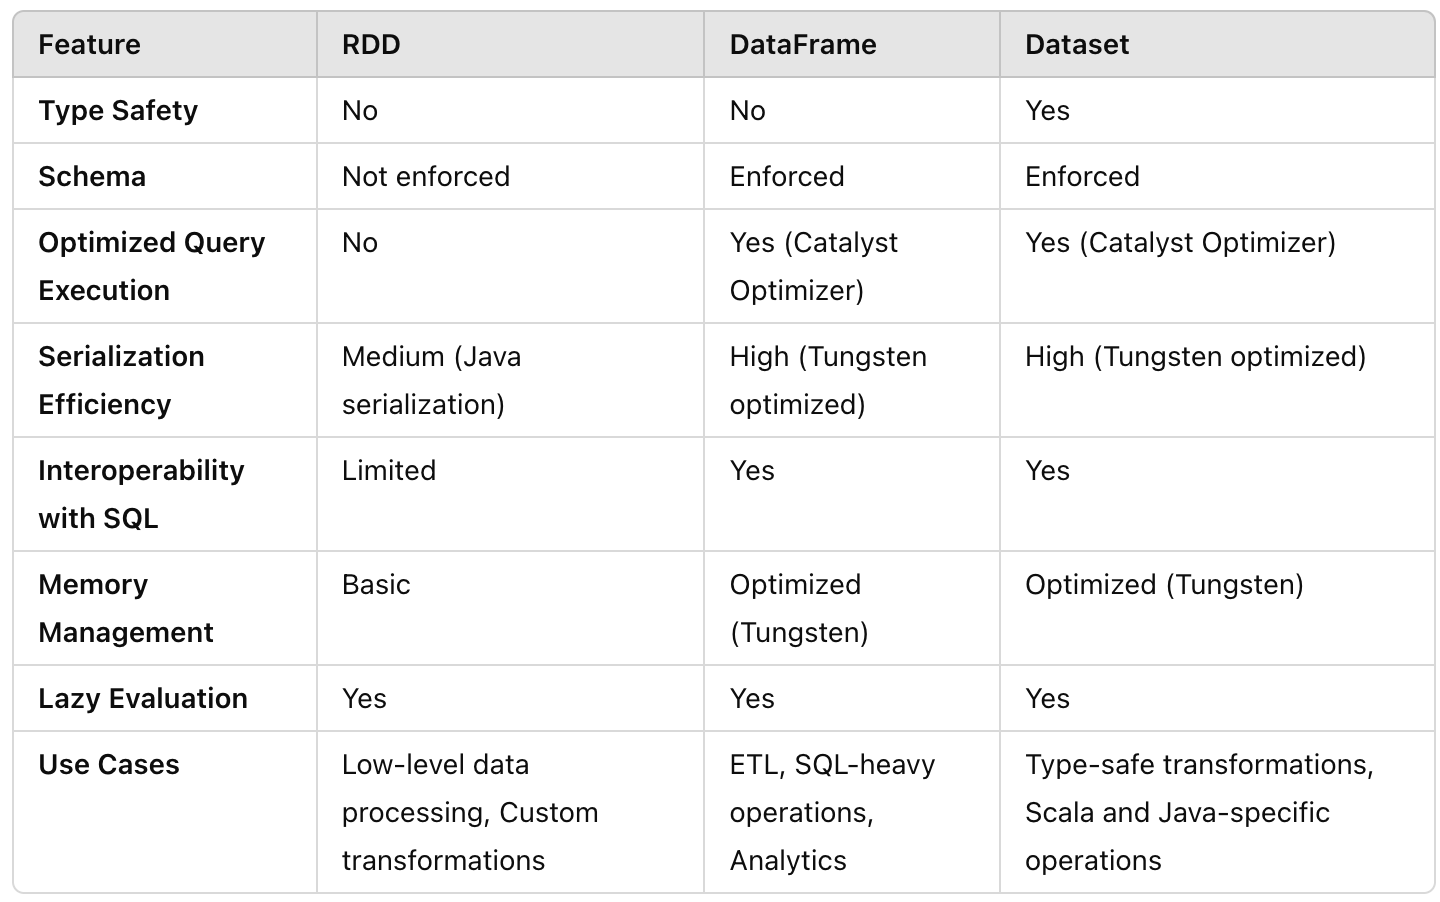

5. Choosing Between RDDs, DataFrames, and Datasets

As an experienced developer, knowing when to use each abstraction is critical:

   - RDDs: Choose RDDs when you need fine-grained control over your transformations, especially for low-level data manipulation. If the data lacks a schema or is unstructured, RDDs provide the flexibility needed.

   - DataFrames: Use DataFrames for structured or semi-structured data where schema information is available. They are particularly advantageous for SQL-based transformations, aggregations, and when you want Spark’s optimizations. DataFrames are the go-to choice for data pipelines, aggregations, and data transformations at scale.

   - Datasets: Datasets are ideal when working with strongly typed data in Scala or Java. If you need both compile-time type safety and the benefits of Catalyst optimization, Datasets are your best choice. They’re a good fit for complex data types and workflows where errors can be caught at compile-time.

6. Example Scenarios:

   - When to Use RDDs: Suppose you’re processing unstructured log data and need complex custom transformations not supported by DataFrames or Datasets.
When to Use DataFrames: Imagine you’re loading a large JSON dataset and need to perform SQL-based aggregations. DataFrames would handle this more efficiently than RDDs.

   - When to Use Datasets: If you’re working in Scala, processing customer data with a complex schema, and want compile-time type safety, Datasets provide a type-safe approach while leveraging Spark’s optimizations.

7. Interview-Style Answer:

Question: "What are RDDs, and how are they different from DataFrames and Datasets?"

Answer: RDDs, or Resilient Distributed Datasets, are Spark’s fundamental data abstraction, representing an immutable, distributed collection of objects. They provide low-level transformations and actions and are suitable for unstructured data. RDDs are resilient due to their lineage, allowing them to recompute data in case of node failures.

In contrast, DataFrames and Datasets are higher-level APIs introduced to make working with structured data easier. DataFrames add a schema to data, allowing for optimizations through the Catalyst engine, and are best suited for structured data and SQL operations. Datasets extend DataFrames by providing type safety and compile-time checks, especially useful in Scala and Java, making them ideal for complex data workflows that benefit from typed data structures. Each abstraction has its use cases, with DataFrames being optimized for large-scale transformations and Datasets adding an additional layer of type safety on top of DataFrames.



### Interview Stype Answer:

RDD (Resilient Distributed Dataset): RDDs are Spark's core data abstraction, representing a distributed collection of elements that can be processed in parallel. RDDs are immutable and fault-tolerant, allowing transformation and action operations.

DataFrame: DataFrames are distributed collections of data organized in named columns. They provide optimized APIs and allow Spark to use Catalyst for query optimization.

Dataset: Datasets are similar to DataFrames but are type-safe, combining the benefits of RDDs (functional programming) and DataFrames (optimizations).

Differences:

   - Optimization: DataFrames and Datasets use Catalyst for optimization, while RDDs don’t.
   - Type Safety: Datasets provide compile-time type safety, whereas RDDs and DataFrames do not.
   - Ease of Use: DataFrames and Datasets offer a higher-level API, making them easier to work with for SQL operations.

# Q3. Explain the difference between transformations and actions in Spark.

In Apache Spark, transformations and actions are the two main types of operations applied to Resilient Distributed Datasets (RDDs) and DataFrames. These operations represent the functional programming style of Spark and play a crucial role in controlling the workflow of data processing. Understanding the distinction between transformations and actions, along with their implications, is key for optimizing and managing large-scale data pipelines in Spark.

1. Overview of Transformations and Actions

Transformations: These are lazy operations that define a data processing step, creating a new RDD or DataFrame without immediately computing it. Transformations are only evaluated when an action is called, and they form the execution plan or Directed Acyclic Graph (DAG) of stages. Examples of transformations include map, filter, flatMap, and reduceByKey.

Actions: These are eager operations that trigger the actual execution of the transformations, performing computations and generating output. Actions either return a value to the Driver or write data to an external storage. Examples include collect, count, saveAsTextFile, and take.

2. Key Differences Between Transformations and Actions

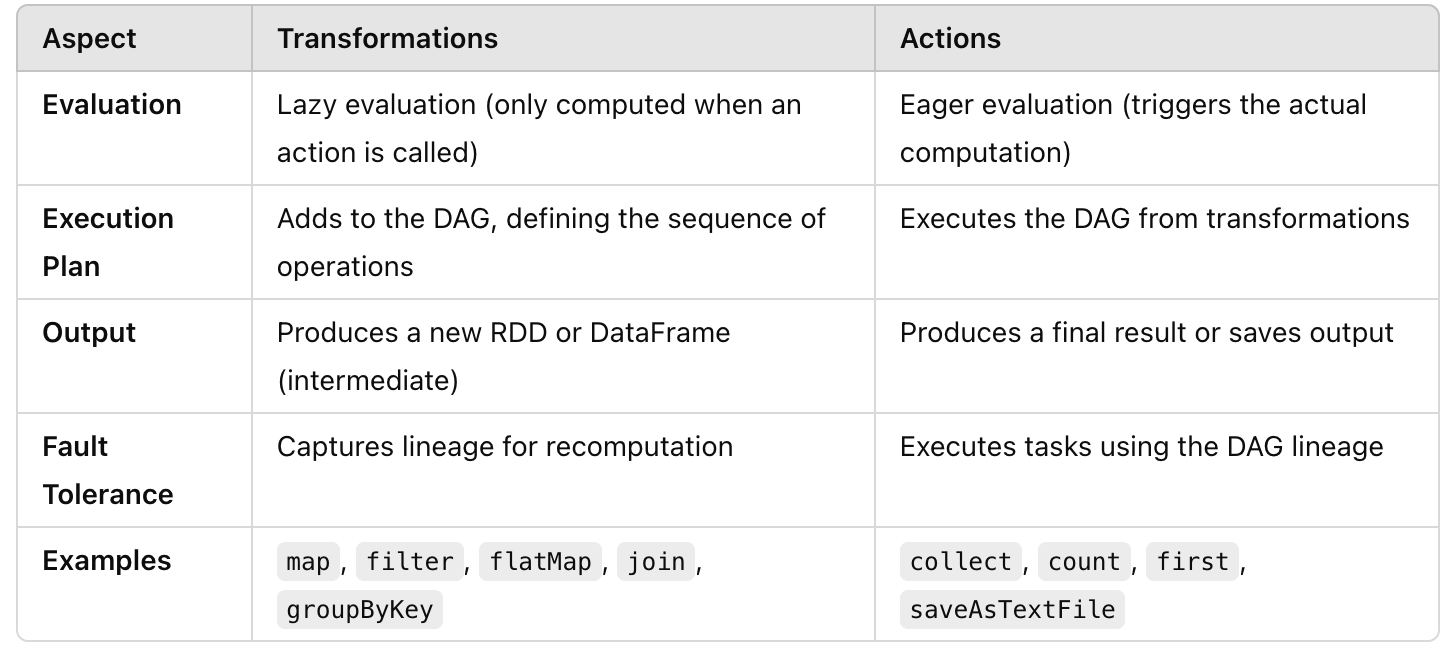

3. Transformations in Detail:

Transformations are primarily divided into two types: narrow and wide transformations.

Narrow Transformations:=>

Definition: Narrow transformations are operations where each partition of the parent RDD/DataFrame contributes to at most one partition in the child RDD/DataFrame. No data shuffle is required, as data resides within the same node or executor.

Examples:

   - map: Applies a function to each element of the RDD/DataFrame, returning a new RDD/DataFrame of the same size.
   - filter: Selects elements based on a condition.
   - flatMap: Applies a function that returns an iterable, flattening each element into multiple elements.

Performance: Narrow transformations are efficient as they avoid network I/O, making them faster and less resource-intensive.


Wide Transformations :=>

Definition: Wide transformations involve shuffles, where data is redistributed across partitions to meet specific requirements. A shuffle operation may require data from all partitions to be moved across the network.

Examples:

   - groupByKey: Groups data by key, shuffling all key-value pairs with the same key to a single partition.
   - reduceByKey: Combines values by key and performs a shuffle.
   - join: Combines two RDDs/DataFrames by a key, resulting in data movement across nodes.

Performance: Wide transformations are costlier and can impact performance due to network traffic and disk I/O. It’s essential to minimize shuffles by using narrow transformations whenever possible.

4. Actions in Detail:

Actions trigger the execution of the DAG. When an action is called, Spark's DAG scheduler organizes transformations into stages, optimizes them, and executes them across the cluster. Actions are divided into those that collect data to the Driver and those that write data to an external system.

Actions Returning Results to the Driver:

   - collect: Gathers all elements of the dataset into an array in the Driver. It should be used cautiously with large datasets to avoid overwhelming the Driver's memory.
   - count: Returns the number of elements in the RDD/DataFrame.
   - first: Returns the first element of the dataset.
   - take(n): Collects the first n elements. Unlike collect, take is safer for large datasets as it only returns a subset.

Actions Writing Results to Storage:

   - saveAsTextFile: Saves the dataset as a text file in the specified directory.
   - saveAsSequenceFile: Saves data as a Hadoop SequenceFile.
   - saveAsObjectFile: Saves data in a serialized format, useful for intermediate caching in Spark jobs.

5. Lazy Evaluation in Transformations and the Role of Actions:

One of Spark’s most powerful features is lazy evaluation. Here’s how it works:

When transformations are applied to an RDD or DataFrame, Spark only records the metadata needed to build the lineage of transformations (DAG).
No computation happens until an action is invoked, allowing Spark to optimize the execution plan by reducing unnecessary computations and combining operations.

Example of Lazy Evaluation and DAG Optimization:
Suppose we have the following sequence of operations:

    rdd = sc.textFile("data.txt")
    result = rdd.filter(lambda x: "error" in x).map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b)
    result.collect()

The filter and map transformations are recorded, but they are only computed when collect() is called. Spark uses this lineage to optimize the plan, pipelining the transformations in a single stage before executing reduceByKey.

6. Practical Implications and Optimization Strategies:

a. Minimize Actions:

Since actions trigger Spark jobs and compute the full DAG, avoid calling multiple actions unnecessarily in a job. Where possible, combine actions or reuse intermediate RDDs/DataFrames to reduce recomputation costs.

b. Reduce Wide Transformations:

Wide transformations are costly due to shuffling. Use alternatives like reduceByKey instead of groupByKey (when possible), as it performs aggregation within each partition before shuffling, reducing data movement.

c. Cache or Persist Intermediate RDDs/DataFrames:

Caching is particularly useful for data that is reused across actions, preventing redundant recomputation. Use persist() or cache() on frequently accessed intermediate RDDs/DataFrames.

7. Transformation and Action Examples in a Spark Workflow:

Here’s a typical Spark workflow showing how transformations and actions are applied step-by-step:

    # Step 1: Load Data (Action)
    rdd = sc.textFile("hdfs://data/input.txt")   # Action to load data

    # Step 2: Apply Transformations
    filtered_rdd = rdd.filter(lambda line: "error" in line)    # Narrow transformation (no shuffle)
    pair_rdd = filtered_rdd.map(lambda line: (line.split()[0], 1))  # Narrow transformation
    count_rdd = pair_rdd.reduceByKey(lambda a, b: a + b)       # Wide transformation (shuffle)

    # Step 3: Action to Trigger Execution and Get Results
    result = count_rdd.collect()    # Action triggers execution
    print(result)

In this workflow:

Narrow transformations like filter and map are applied first, incurring minimal overhead as they don't shuffle data across partitions.
The wide transformation reduceByKey involves a shuffle, redistributing data by key across partitions.
The collect() action finally triggers execution, prompting Spark to execute each stage based on the DAG lineage built through the transformations.

8. Conclusion:

Understanding transformations and actions in Spark is critical for building efficient data pipelines. Transformations help define the logical data processing plan, while actions trigger the physical execution of this plan. By balancing transformations and actions and optimizing wide transformations, you can leverage Spark's lazy evaluation, reduce data shuffling, and ultimately improve the performance and scalability of your Spark jobs.



Interview Style Answer:

Transformations: Operations that create a new RDD, DataFrame, or Dataset from an existing one, like map(), filter(), flatMap(). Transformations are lazy; they don’t execute until an action is called.

Actions: Operations that trigger the actual computation, like collect(), count(), saveAsTextFile(). Actions return a result to the driver or write data to storage.

Lazy evaluation allows Spark to optimize the execution plan by combining transformations and minimizing data shuffles.

# Q4. What are narrow and wide transformations in Spark, and why do they matter?

In Spark, transformations are divided into two categories: narrow and wide transformations. These categories refer to how data flows between partitions during processing, which impacts performance and efficiency, especially in distributed environments. Understanding the difference between narrow and wide transformations is essential for optimizing data flow, minimizing shuffling, and ensuring efficient resource utilization.

Narrow Transformations:

Definition: A narrow transformation is an operation where each partition of the input RDD or DataFrame contributes to at most one partition of the output. In other words, the data dependencies are local to each partition, meaning that data does not need to be shuffled across the network.

Examples:

   - map: Applies a function to each element in the RDD/DataFrame, creating a new RDD/DataFrame with the transformed data in the same partition structure.
   - filter: Filters elements in each partition based on a condition, retaining the partitioning.
   - flatMap: Applies a function to each element that can produce zero or more outputs, flattening the result within each partition.
   - mapPartitions: Applies a function to each partition rather than individual elements, transforming data locally within each partition.


Characteristics:

   - No shuffling required: Data is processed within the same partition, avoiding network traffic and making these operations fast and efficient.
   - Low latency: Narrow transformations generally have lower overhead because they do not require data movement across the cluster.
   - Better performance: They are computationally inexpensive as each transformation works within its partition boundary.

Example of Narrow Transformation:

    # Filter and map transformations are narrow
    rdd = sc.textFile("data.txt")
    filtered_rdd = rdd.filter(lambda line: "error" in line)  # Narrow transformation
    mapped_rdd = filtered_rdd.map(lambda line: (line.split()[0], 1))  # Narrow transformation

In this example, both filter and map operate independently within each partition of rdd, and no shuffle is needed.

Wide Transformations:

Definition: A wide transformation is an operation where data from multiple partitions of the input RDD or DataFrame may be needed by multiple partitions of the output RDD. This results in data shuffling, where Spark redistributes data across the network to satisfy the transformation requirements.

Examples:

   - groupByKey: Groups data by key, requiring all values with the same key to be moved to the same partition.
   - reduceByKey: Aggregates data by key across partitions, shuffling data to ensure that values with the same key are in the same partition.
   - join: Combines two RDDs or DataFrames based on a key, requiring data from each RDD with matching keys to be colocated in the same partition.
   - distinct: Removes duplicate entries, which often requires moving data to ensure unique values.

Characteristics:

   - Shuffling required: Wide transformations require shuffling data across partitions, which can be expensive and time-consuming.
   - Higher latency: Shuffling increases the overall processing time because data must be serialized, sent across the network, deserialized, and recombined.
   - Resource intensive: Wide transformations increase CPU, memory, and I/O usage due to data movement and re-partitioning.

Example of Wide Transformation

    # reduceByKey is a wide transformation as it requires data shuffling
    rdd = sc.textFile("data.txt")
    mapped_rdd = rdd.map(lambda line: (line.split()[0], 1))  # Narrow transformation
    count_rdd = mapped_rdd.reduceByKey(lambda a, b: a + b)  # Wide transformation

Here, reduceByKey needs to aggregate values by key across partitions, causing data with the same key to be shuffled to the same partition.

#### Why Narrow and Wide Transformations Matter: 

Performance Optimization:

   - Narrow transformations are generally faster as they avoid shuffling, making them ideal for initial stages of data processing or transformations where partition-local computation suffices.
   - Wide transformations are costly due to the data shuffle. Minimizing the use of wide transformations can significantly enhance performance. In scenarios where shuffling is unavoidable, such as joins, it’s important to optimize data partitioning.

Resource Utilization:

   - Shuffling during wide transformations is network-intensive and can require more CPU and memory. Spark jobs with frequent wide transformations might demand additional resources, leading to longer execution times and potential bottlenecks.
   - Efficiently combining narrow transformations before wide transformations can reduce the amount of data being shuffled, conserving both memory and CPU resources.

Fault Tolerance:

   - Spark uses lineage information for recovery in the event of task failure. Narrow transformations are easier to recompute because the data dependencies are local.
   - Wide transformations, however, can complicate fault tolerance as Spark needs to reconstruct shuffled data, which involves additional overhead.


Use in Pipeline Design:

A well-designed Spark pipeline will strategically sequence narrow transformations before wide transformations to reduce shuffling as much as possible.
For instance, in a typical ETL pipeline, filtering or transforming data locally (narrow) before grouping or joining (wide) helps reduce data volume, making shuffles faster and more manageable.

Partitioning Optimization:

For wide transformations, Spark’s partitioning strategy directly impacts performance. Re-partitioning data based on known keys can reduce the shuffling overhead.
Optimizing the number of partitions (e.g., through repartition or coalesce) helps achieve an optimal balance, especially for wide transformations, by reducing the number of shuffle operations across the network.

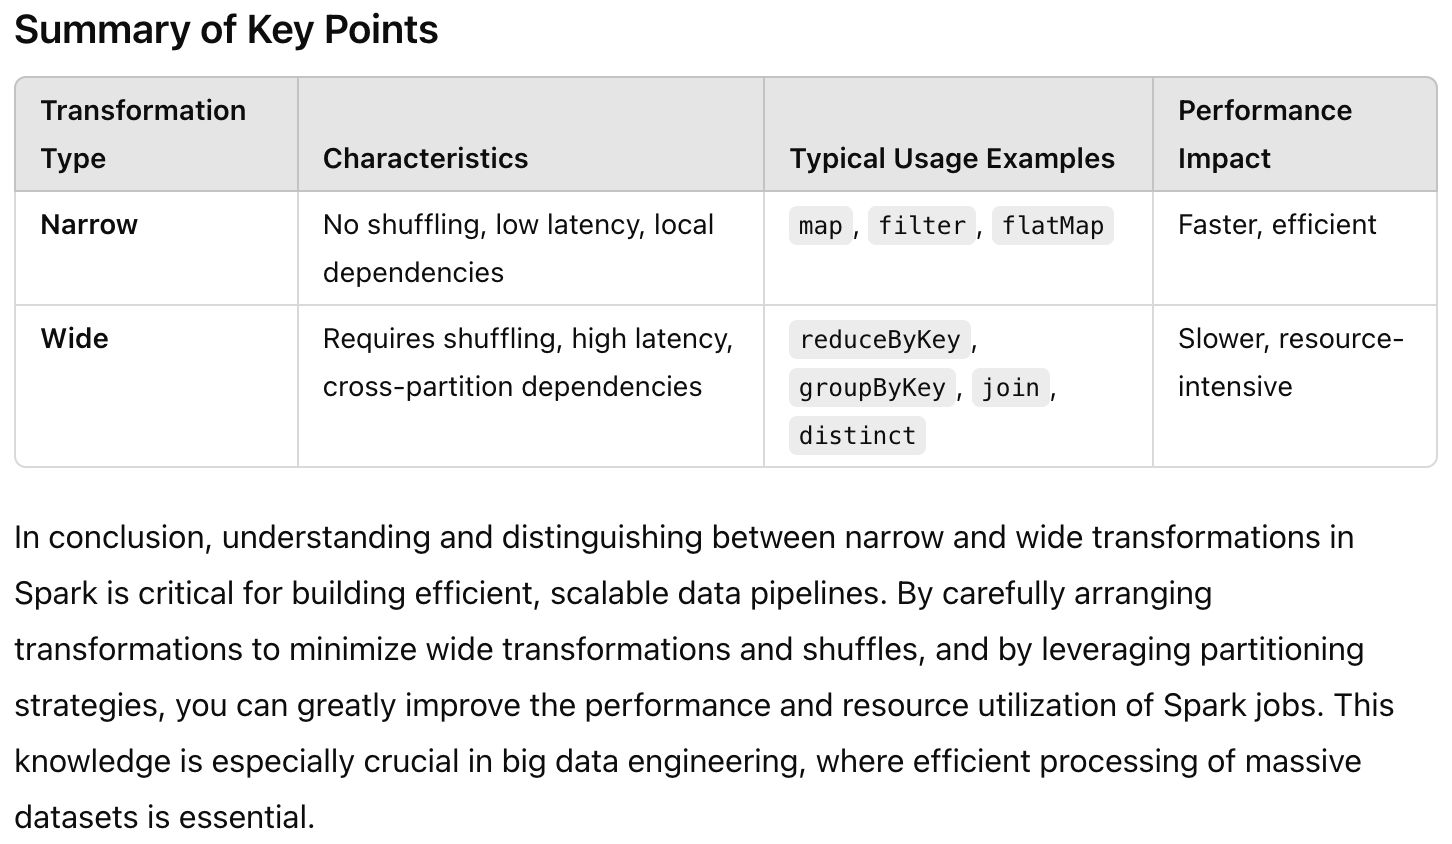


Interview Style Answer:

Narrow Transformation: Data required to compute the result is from a single partition (e.g., map, filter). They don’t involve data shuffling between nodes, making them faster.

Wide Transformation: Requires data from multiple partitions (e.g., reduceByKey, groupByKey). This leads to a shuffle where data is transferred across the cluster, impacting performance.

Understanding these helps in optimizing Spark jobs by minimizing shuffles.

# Q5. Describe Spark’s fault tolerance mechanisms. How does it recover lost data?

Spark’s fault tolerance mechanisms are a crucial part of its design, ensuring reliable execution even when hardware or software failures occur during data processing. Spark achieves fault tolerance primarily through lineage information and data replication in the case of RDDs and checkpointing in structured streaming. Here’s an in-depth explanation of Spark’s fault tolerance mechanisms and how it recovers lost data:

1. Lineage and Directed Acyclic Graph (DAG):

Spark uses a Directed Acyclic Graph (DAG) to record the series of transformations applied to an RDD or DataFrame. This DAG is also known as lineage information and represents the entire sequence of operations needed to compute the RDD from its original data source. By tracking these transformations, Spark can recompute lost or damaged data from scratch if any part of the data is lost during processing.

How Lineage Works for Fault Tolerance:

Lineage tracks transformations: When you perform transformations on an RDD or DataFrame, Spark records each step (e.g., map, filter, join) in a lineage graph.
Recomputing lost partitions: If a failure occurs and a partition is lost, Spark refers to the lineage to reconstruct only the missing partition. It does not need to recompute the entire dataset, only the portion that was affected.
Avoids data replication overhead: Unlike some distributed systems that replicate data for fault tolerance, Spark relies on lineage, which is generally more memory- and resource-efficient.

Example:

Suppose we have the following RDD transformations:


    rdd = sc.textFile("data.txt")
    filtered_rdd = rdd.filter(lambda line: "error" in line)
    mapped_rdd = filtered_rdd.map(lambda line: (line.split()[0], 1))
    count_rdd = mapped_rdd.reduceByKey(lambda a, b: a + b)

If one partition of count_rdd fails during execution, Spark will trace back through the lineage to mapped_rdd, filtered_rdd, and finally rdd, recomputing only the necessary transformations to restore the lost partition.

2. Checkpointing:

While lineage is effective, it can become inefficient if the DAG is very long or complex. Spark provides a checkpointing mechanism that saves intermediate data to a reliable storage (e.g., HDFS, S3) to break up the lineage and reduce recomputation costs.

Types of Checkpointing:

RDD Checkpointing: Users can specify a point in the processing pipeline where Spark will save an RDD to storage. This clears the lineage information up to that checkpoint and reduces the computation needed if recovery is required. However, checkpointing is expensive in terms of I/O, so it’s generally used only when the lineage graph becomes too complex.

Streaming Checkpointing: For long-running Spark Structured Streaming jobs, Spark uses checkpointing to ensure consistent state management and fault tolerance. This enables it to recover and continue processing in the event of failure without losing streaming data.

Example

    # Marking an RDD for checkpointing
    rdd = sc.textFile("data.txt")
    rdd = rdd.filter(lambda line: "error" in line)
    rdd.checkpoint()  # Saves RDD state to a durable storage

After checkpointing, if Spark fails, it can resume processing from this checkpoint rather than recomputing the entire lineage.

3. Task and Stage-Level Fault Tolerance:

Spark executes jobs by dividing them into stages and further into tasks that are distributed across worker nodes in a cluster. Each task processes a partition of data, and if a task or node fails, Spark re-executes only the failed tasks instead of the entire job.

Task Recovery:
   - If a task fails, Spark reruns it on a different executor, relying on lineage to reconstruct the lost data.

Speculative execution: 
   - To handle situations where some tasks are slower than others (stragglers), Spark can enable speculative execution, which runs multiple copies of a slow task on different nodes. When one copy completes, Spark ignores the rest, speeding up job completion.


4. Data Replication for Resilient Distributed Datasets (RDDs):

Spark can replicate the RDD partitions across nodes, ensuring data availability if an executor fails. This replication, however, is not mandatory and is typically only used in specific cases or environments where data recovery is critical.

In-memory replication: If a user specifies a storage level that includes replication, Spark keeps a copy of each partition in memory (or disk) across multiple nodes. This provides quick recovery but requires additional memory resources.

Storage levels: The persist method allows users to specify various storage levels (e.g., MEMORY_ONLY, MEMORY_AND_DISK, MEMORY_ONLY_SER), which control the replication and storage strategies used for RDDs.

Example of RDD Persistence:

    rdd.persist(StorageLevel.MEMORY_AND_DISK_2)  # Replicates each partition across two nodes

In this example, if a node fails, Spark can retrieve the partition from another node with minimal recomputation.

5. Fault Tolerance in Spark Structured Streaming:

In Spark Structured Streaming, fault tolerance is handled differently due to the continuous nature of data streams.

Checkpointing: As mentioned, streaming jobs checkpoint progress, ensuring that the state is saved periodically and is available for recovery.
WAL (Write-Ahead Log): For operations like updates and writes to external sinks, Spark Structured Streaming can use a WAL. This log ensures that even if there’s a failure mid-operation, Spark can resume exactly from where it left off, making streaming applications both stateful and reliable.


Summary of Spark’s Fault Tolerance Mechanisms:

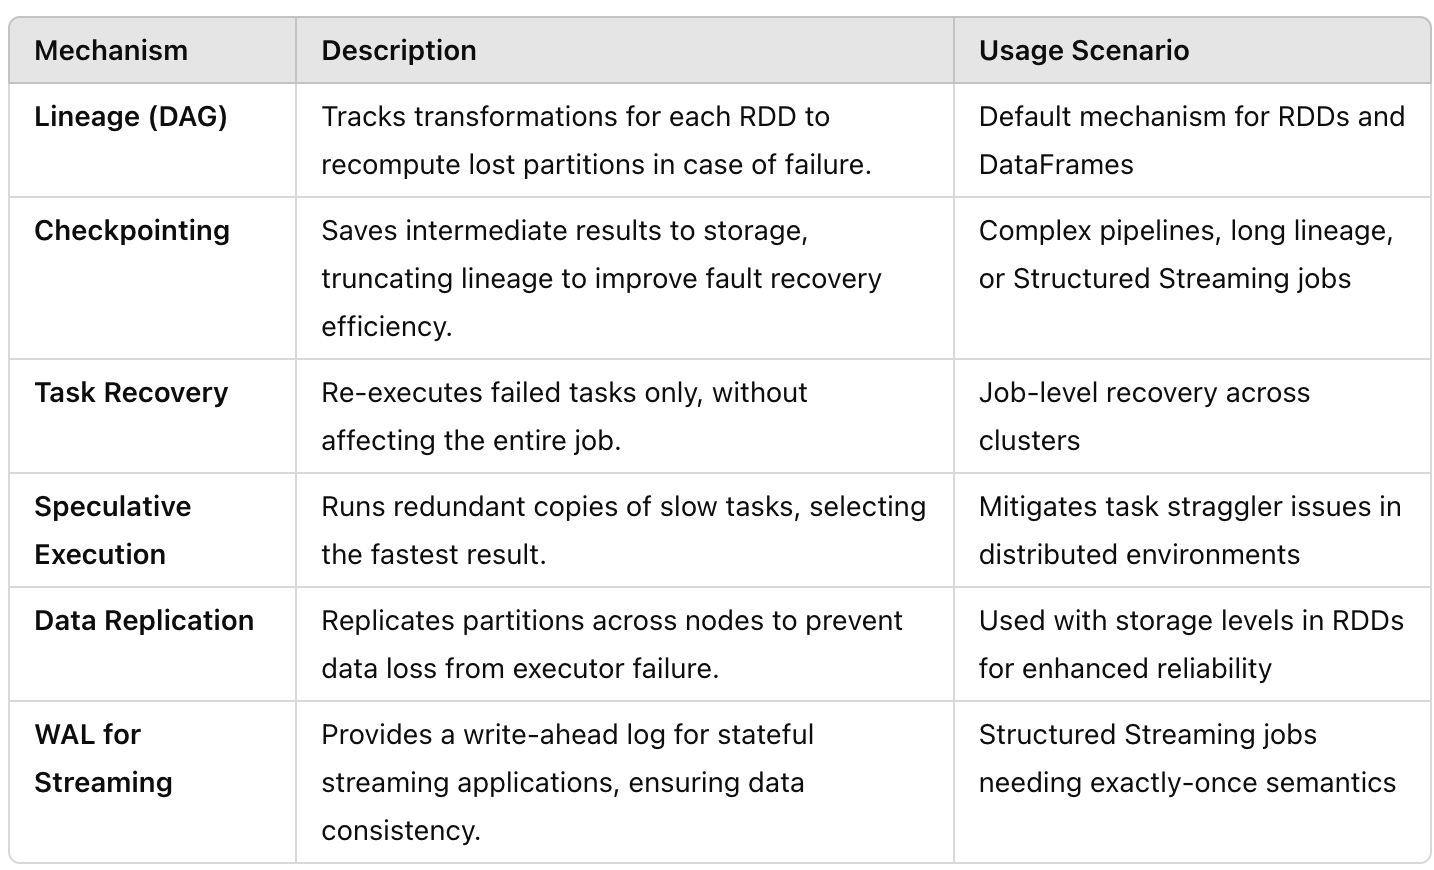

Why Fault Tolerance Matters in Spark?

Data Reliability: In distributed systems, hardware and network failures are common. Spark’s fault tolerance mechanisms ensure that data processing can continue without losing data.

Cost Efficiency: By recomputing only the lost partitions or using checkpoints strategically, Spark avoids the need to restart entire jobs, reducing resource waste and time.
Performance Optimization: With speculative execution and task-level recovery, Spark minimizes delays due to task failures and ensures efficient resource utilization.

Real-Time and Streaming Support: Spark’s fault tolerance also extends to real-time data processing in Structured Streaming, enabling applications to recover state seamlessly and continue processing.


In conclusion, Spark’s approach to fault tolerance through lineage, checkpointing, task recovery, and data replication allows it to be a reliable platform for big data processing. These mechanisms provide flexibility to balance between resource efficiency and reliability, making Spark well-suited for both batch and real-time data processing in large-scale distributed environments.


Interview Style Answer:

Apache Spark achieves fault tolerance primarily through its RDD (Resilient Distributed Dataset) model. The key mechanisms include:

Lineage: Spark maintains the lineage information of RDDs, which tracks how RDDs are derived from one another. If data is lost (e.g., due to node failure), Spark can recompute the lost data from its parent RDDs by replaying the operations.

Checkpointing: For large, long-running jobs, Spark can periodically checkpoint RDDs to reliable storage (e.g., HDFS or S3). This saves the RDD data to disk and allows recovery in case of failure. However, this incurs additional I/O overhead.

Replication: For certain operations, like when working with HDFS or other distributed file systems, Spark can replicate the RDD partitions across different nodes to ensure fault tolerance.

Thus, when a node fails or data is lost, Spark can either recompute the data using lineage or fetch it from replicated partitions or checkpoints.

# Q6. How does Spark handle memory management, and what are some best practices to avoid memory errors?

Spark handles memory management using a combination of Java Virtual Machine (JVM) memory management techniques and its own mechanisms for organizing, storing, and managing data in memory. As Spark processes massive datasets in-memory to enable fast computation, proper memory management is essential to prevent errors like OutOfMemoryError. Here’s an in-depth look at how Spark manages memory, along with best practices to avoid memory issues.

1. Spark Memory Architecture:

Spark divides its memory into two main regions: execution memory and storage memory. This division, managed within the JVM heap, helps Spark optimize memory use for both computation and data caching.

   - Execution Memory: This is used for tasks like shuffles, joins, sorting, aggregations, and any intermediate data that cannot be spilled to disk. Execution memory is also needed for RDD operations such as map and reduce.

   - Storage Memory: This memory is reserved for caching RDDs, DataFrames, and broadcasting variables. Storage memory enables in-memory caching, making repeated computations on the same dataset much faster.

The division of memory between execution and storage regions is dynamically managed:

If execution memory requires more space, it can borrow from storage memory and vice versa, but only if there is enough unoccupied space available.

If storage memory reaches capacity, Spark will evict old cached data according to the least-recently-used (LRU) policy to free up space for new data.

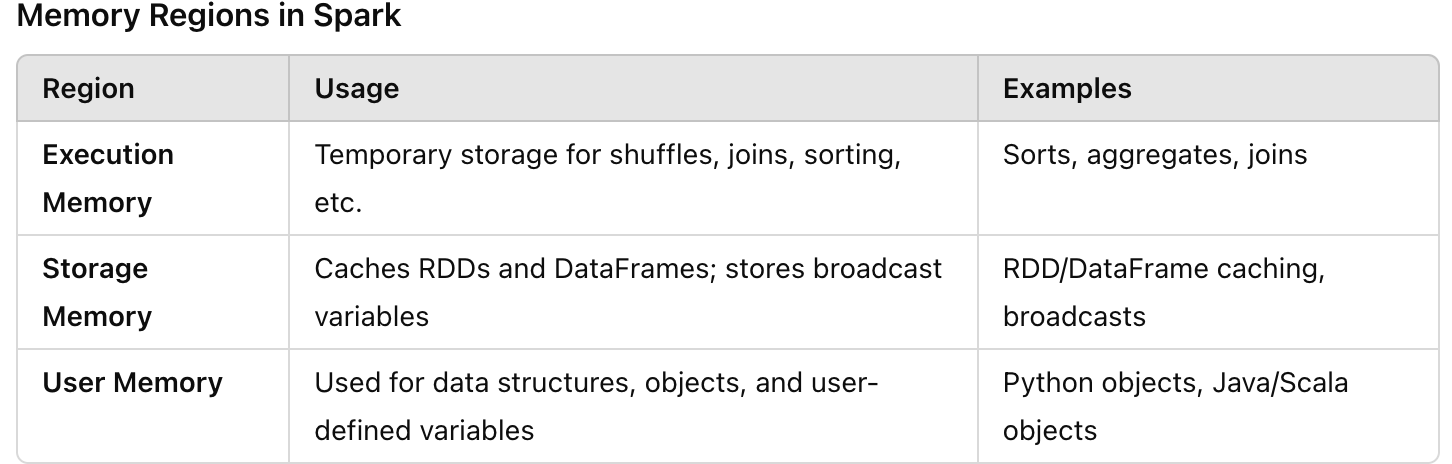

2. Memory Management Settings and Parameters:

Several key memory parameters can be configured in Spark to optimize memory management:

spark.executor.memory: This setting defines the amount of memory allocated to each Spark executor (i.e., JVM process), influencing the amount of memory available for tasks.

spark.driver.memory: Sets the memory allocated to the Spark driver. This is important for handling the results and aggregations collected by the driver.

spark.memory.fraction: A value between 0 and 1 that specifies the fraction of the executor memory to be used for unified memory management (default is 0.6). The remaining memory is reserved for user-defined objects and internal Spark metadata.

spark.memory.storageFraction: Controls the fraction of spark.memory.fraction allocated to storage (default is 0.5). This means by default, 50% of memory allocated for unified memory management is dedicated to caching.

spark.memory.offHeap.enabled and spark.memory.offHeap.size: Spark can use off-heap memory to bypass the JVM’s garbage collection, potentially improving performance. These settings allow Spark to allocate additional memory outside the JVM heap, reducing GC impact.

3. Best Practices for Managing Memory and Avoiding Errors:

Managing memory effectively requires tuning and an understanding of how Spark workloads utilize memory. Here are some best practices to avoid memory issues:

A. Optimize Executor and Driver Memory Allocation:

Set appropriate executor memory: Allocate enough memory for each executor based on the workload. A general rule is to keep the executor memory between 4-8 GB to avoid excessive GC time.

Adjust driver memory if needed: For operations involving large data shuffles or aggregations, allocate more memory to the driver.

B. Avoid Skewed Data and Large Shuffles:

Balance partitions: Skewed data, where some partitions are significantly larger than others, can lead to memory overloads in those partitions. Use repartition() or coalesce() to balance partition sizes.

Broadcast joins for small tables: For joins involving small datasets, use broadcast joins (broadcast() function) to minimize shuffle operations.

C. Use In-Memory Caching Judiciously:

Cache only frequently used datasets: Caching can improve performance but uses storage memory. Cache only the datasets reused multiple times. Use unpersist() to release memory after caching is no longer needed.

Choose the appropriate storage level: By default, Spark caches data in memory. You can cache data to disk if memory is insufficient by using MEMORY_AND_DISK storage levels.

    # Example of caching with MEMORY_AND_DISK
    df.cache().persist(StorageLevel.MEMORY_AND_DISK)

D. Use Off-Heap Memory (If Applicable)

Enable off-heap memory: If running on memory-intensive tasks, consider enabling off-heap memory with spark.memory.offHeap.enabled and configure the spark.memory.offHeap.size parameter.

Avoid excessive off-heap memory: Ensure it is not too large, as it will take system memory resources that are not managed by Spark's unified memory.

E. Minimize Garbage Collection (GC) Impact

Monitor and adjust GC settings: Java’s default garbage collector (GC) may not be ideal for large memory allocations. For instance, the G1GC collector is often more efficient for large heap sizes. Set it using:


--conf "spark.executor.extraJavaOptions=-XX:+UseG1GC"

Use Kryo serialization: The default Java serializer can be memory-intensive for complex objects. Kryo is faster and more compact, reducing memory usage. Enable it with:


 spark.conf.set("spark.serializer", "org.apache.spark.serializer.KryoSerializer")

F. Use Columnar Storage Formats (e.g., Parquet, ORC)

Parquet and ORC: Columnar formats are efficient for Spark’s in-memory data representation. They compress better and read only the required columns, reducing memory usage.
Partition data: Using partitions with columnar storage reduces the memory footprint for each partition, speeding up processing.

4. Monitoring and Debugging Memory Issues

Spark provides tools to monitor memory use and troubleshoot issues:

   - Spark UI: The Spark Web UI displays memory usage details, task-level metrics, and GC information.
   - Logging and metrics: Use Spark logs and metrics to identify memory bottlenecks. Configure logging for memory warnings.
   - Spark’s built-in metrics: Use spark.metrics.conf to set up monitoring of executor metrics (including memory and GC stats).

Example Configurations for Memory Optimization:

For example, if you are processing a memory-intensive workload and encountering frequent GC pauses, you could set the following configurations:


    --conf "spark.executor.memory=8g" \
    --conf "spark.driver.memory=4g" \
    --conf "spark.memory.fraction=0.7" \
    --conf "spark.memory.storageFraction=0.4" \
    --conf "spark.executor.extraJavaOptions=-XX:+UseG1GC" \
    --conf "spark.serializer=org.apache.spark.serializer.KryoSerializer"

In this configuration:

Executor memory is set to 8 GB, and driver memory to 4 GB.

Memory fraction is set to 0.7, meaning 70% of executor memory is available for storage and execution.

Storage fraction is set to 0.4 (within the unified memory), reserving a smaller portion for cached data to leave more room for execution memory.

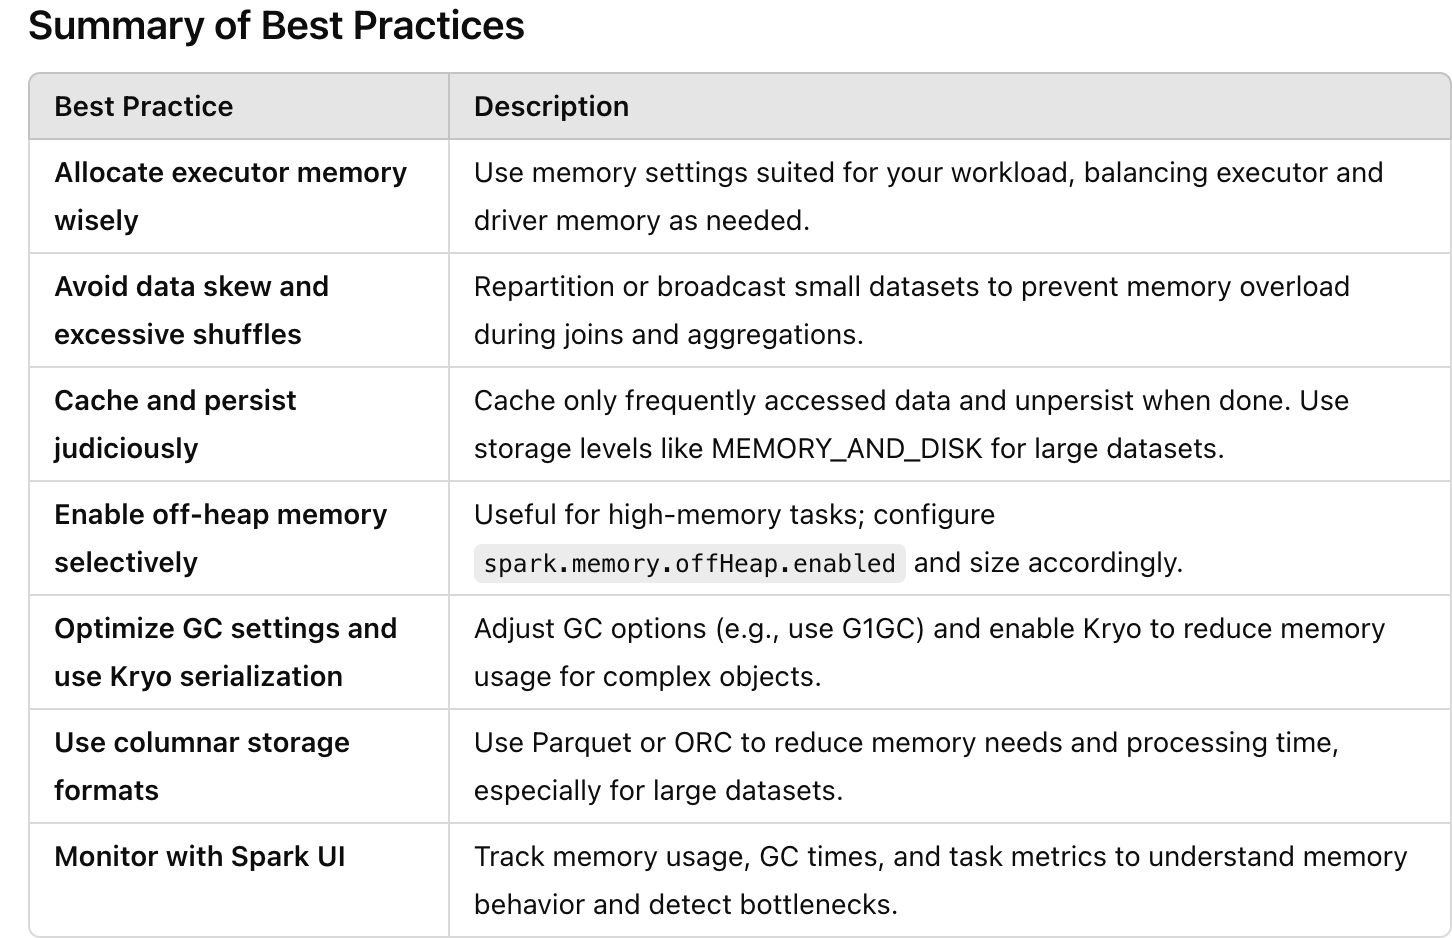


Interview Stype Answer:


Apache Spark manages memory through a combination of its own memory management mechanisms and the Java Virtual Machine (JVM) settings, which are especially crucial given Spark's in-memory processing model for high-speed computations. Spark's memory is primarily divided into two main categories: execution memory and storage memory.

Execution Memory: This is used for operations such as shuffles, joins, aggregations, and other transformations that involve intermediate data processing. Spark relies heavily on this memory for performing computations that are not cached.

Storage Memory: This area is reserved for caching data, such as RDDs or DataFrames, as well as broadcast variables. Caching can significantly speed up processing when the same data is used multiple times across jobs.

Spark uses a unified memory model where it dynamically manages these two types of memory within a shared pool. If either execution or storage memory needs more space, Spark can borrow from the other, provided there's enough available memory, thus optimizing memory utilization.

To avoid memory errors in Spark, here are some key best practices:

Optimize Executor and Driver Memory: Assign adequate memory for executors (spark.executor.memory) based on your workload. Typically, executor memory should be in the range of 4-8 GB to avoid heavy GC overhead. Similarly, increase driver memory (spark.driver.memory) if the driver is handling large aggregations or complex logic.

Balance Partitions and Avoid Data Skew: Uneven partitions, often due to data skew, can overload specific tasks. This can be mitigated by using repartition() or coalesce() to create balanced partition sizes. For smaller datasets involved in joins, leveraging broadcast joins with broadcast() can minimize shuffling and memory load.

Use Caching Selectively and Persist with the Right Storage Level: Cache data only when it is accessed multiple times. Use MEMORY_ONLY storage level if the data fits in memory, or MEMORY_AND_DISK for larger datasets that may need disk spill-over.

Enable Off-Heap Memory for High-Memory Workloads: Spark supports off-heap memory, which can reduce garbage collection overhead by shifting memory allocation outside the JVM heap. This can be activated by enabling spark.memory.offHeap.enabled and setting spark.memory.offHeap.size accordingly.

Use Efficient Serialization: To reduce memory usage and serialization overhead, it's recommended to use Kryo serialization (spark.serializer=org.apache.spark.serializer.KryoSerializer) rather than the default Java serializer, as Kryo is faster and more memory-efficient.

Optimize Garbage Collection (GC) Settings: Large Spark jobs can often benefit from setting the G1GC garbage collector, which is more efficient for handling large heaps compared to the default GC. This can be set with spark.executor.extraJavaOptions=-XX:+UseG1GC.

Use Columnar Storage Formats and Partitioned Data: Columnar formats such as Parquet or ORC help reduce memory usage due to better compression and selective reading of columns, which optimizes in-memory operations.

Monitor Memory Usage with Spark UI: Finally, keeping an eye on the Spark UI during job execution helps identify bottlenecks, memory usage spikes, and garbage collection patterns. This information is invaluable for adjusting settings based on workload requirements.

In summary, Spark’s memory management is highly configurable, and avoiding memory errors involves a combination of proper configuration, data balancing, and memory-efficient coding practices. These steps help ensure optimal memory usage and prevent issues like OutOfMemoryErrors or excessive garbage collection.


Interview Style Answer:

Spark’s memory management is divided into two primary categories:

   - Execution Memory: This is used for storing shuffle data, RDDs, and intermediate results during transformations (e.g., map, reduce).
   - Storage Memory: This is used for caching or persisting RDDs and DataFrames that need to be reused in subsequent stages.
   - Memory management in Spark is controlled via configurations like spark.memory.fraction, which sets the fraction of heap space dedicated to Spark’s memory pool, and spark.executor.memory, which sets the memory allocated to each executor.

Best practices to avoid memory errors:

Tuning memory configurations: Adjust spark.executor.memory, spark.memory.fraction, and spark.memory.storageFraction based on job requirements.

Avoid large shuffles: Shuffling data between partitions is memory-intensive. Use narrow transformations (e.g., map) when possible.

Broadcasting small datasets: For joins, use broadcast() for small datasets to avoid shuffle.

Avoid caching too much data: Only cache RDDs that will be reused multiple times in your computation to avoid memory overload.

Repartition or coalesce data: Use repartition() and coalesce() to adjust the number of partitions based on the data size to avoid creating large tasks that consume excessive memory.

# Q7. What is the difference between cache() and persist() in Spark? When would you use each?

In Apache Spark, both cache() and persist() are used to store data in memory to speed up processing by reusing intermediate results rather than recomputing them. However, there are key differences in how they work and when to use each:

1. cache():

Description: The cache() method is a shorthand for the persist() method with the default storage level, MEMORY_ONLY. This means it stores the data only in memory and does not back it up to disk.

Usage: Use cache() when the dataset can fit entirely into memory and when recomputation is more costly than storing it in memory. It’s especially suitable for iterative operations, like machine learning algorithms, where the same dataset is repeatedly used in memory.

Storage Level: MEMORY_ONLY

Example:

 rdd.cache()

2. persist():

Description: The persist() method is more flexible than cache() because it allows you to specify different storage levels. For example, you can use MEMORY_AND_DISK, MEMORY_ONLY_SER, or DISK_ONLY, depending on how much memory is available and how important it is to avoid recomputation.

Usage: Use persist() when you need more control over the storage level. For example, if the dataset is too large to fit in memory, you can choose MEMORY_AND_DISK, which stores as much as possible in memory and spills the rest to disk. This is also useful for fault tolerance, as some storage levels will allow data recovery if a node fails.

Storage Levels: Multiple options (e.g., MEMORY_ONLY, MEMORY_AND_DISK, DISK_ONLY, etc.)

Example:

    rdd.persist(StorageLevel.MEMORY_AND_DISK)

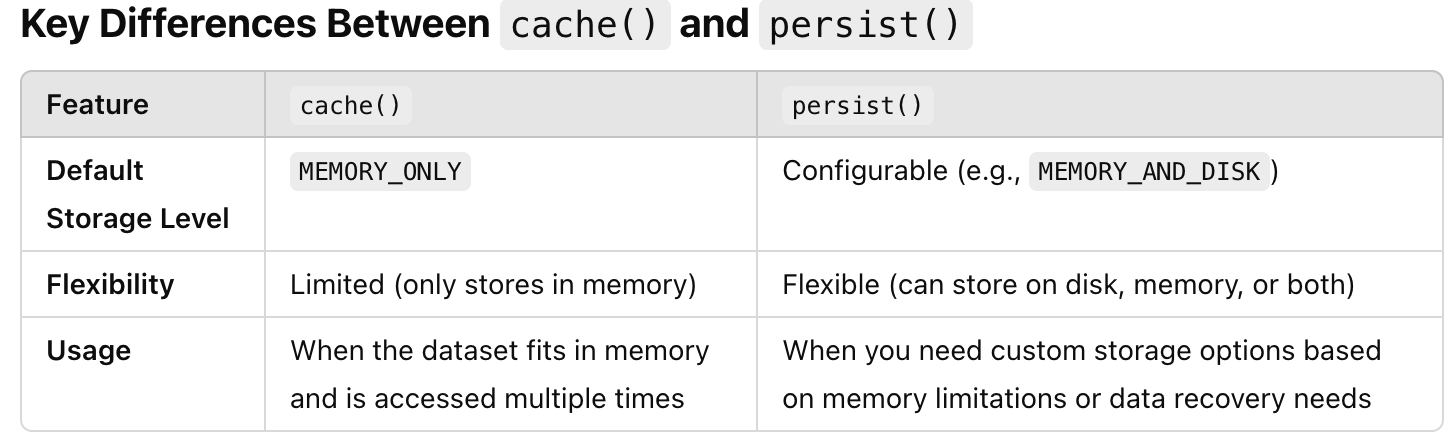

Use cache() when:

   - You’re certain the data can fit in memory.
   - You don’t need custom storage levels.
   - You want a quick way to cache a dataset in memory.

Use persist() when:

   - The dataset might exceed available memory.
   - Fault tolerance or flexibility in storage is needed.
   - You want control over storage levels, such as using disk storage as a fallback.

In summary, cache() is convenient for in-memory caching with the default storage level, while persist() is the more versatile option when dealing with large datasets or requiring specific storage configurations for optimized resource usage.



Interview Style Answer:

cache(): This is a shorthand for persist(StorageLevel.MEMORY_AND_DISK), which stores the RDD or DataFrame in memory, and if not enough space is available, it spills data to disk.

persist(): This provides more control by allowing you to specify the storage level. You can persist the data in memory, on disk, or a combination (e.g., MEMORY_ONLY, MEMORY_AND_DISK, DISK_ONLY, MEMORY_ONLY_SER).

When to use each:

Use cache() when you expect to reuse data multiple times, and it can fit in memory.

Use persist() with a specific storage level if you need more control over how Spark stores your data, especially when dealing with large datasets that may not fit entirely in memory.


# Q8. Explain the role of the Spark driver, executor, and cluster manager in a Spark application?

In a Spark application, the Spark driver, executors, and cluster manager work together to distribute, execute, and manage tasks across a cluster of resources, allowing for efficient, parallelized data processing. Here’s a breakdown of each component’s role:

1. Spark Driver:

Role: The Spark driver is the central component that initiates and manages a Spark application. It is responsible for coordinating the execution of a job and maintaining the application’s lifecycle.

Functions:

   - Job Coordination: It defines the application logic and submits tasks to the executors for processing.
   - DAG (Directed Acyclic Graph) Creation: The driver takes high-level operations (transformations and actions) and constructs a DAG, outlining the sequence of computations that need to occur.
   - Task Scheduling: It breaks down the DAG into stages and tasks, then schedules these tasks to run on executors.
   - Result Aggregation: It collects the results from executors, performs any necessary aggregations, and outputs the final result of the application.
   - Location: The driver program typically runs on the client machine in a standalone environment or within a dedicated node in a cluster environment (such as YARN or Kubernetes).
   - Resilience: If the driver fails, the entire Spark application fails, as the driver is responsible for job coordination.

2. Executors

Role: Executors are distributed across the cluster and perform the actual data processing tasks in a Spark application. Each executor is a separate JVM process responsible for executing a subset of tasks on data partitions.

Functions:

   - Task Execution: Executors receive tasks from the driver, which they execute on data partitions. Each executor can handle multiple tasks concurrently, depending on available cores.
   - Data Storage: They store data for intermediate results or cached datasets in memory, which speeds up processing for iterative jobs.
   - Reporting Results: After task execution, executors return results (such as partial aggregations) back to the driver.
   - Lifecycle: Executors run for the duration of the Spark application and are terminated once the job completes. In a cluster setup, resources are managed by the cluster manager, which may release idle executors.
   - Resilience: If an executor fails, the driver can reschedule its tasks on another executor, allowing the application to recover from the failure.

3. Cluster Manager:

Role: The cluster manager is responsible for resource allocation and management for Spark applications. It interfaces with the Spark driver to request resources and manages executors across the cluster.

Common Cluster Managers:

   - Standalone: Spark’s built-in cluster manager, suitable for small or dedicated Spark clusters.
   - YARN (Yet Another Resource Negotiator): Often used with Hadoop clusters, YARN allocates resources to applications across a multi-tenant environment.
   - Kubernetes: A container-based manager, which allows Spark to run on a Kubernetes cluster, providing containerized deployments and scaling.
   - Mesos: A general-purpose cluster manager that can run multiple applications, though it’s less commonly used now.

Functions:

   - Resource Allocation: It allocates and manages the necessary resources (CPU, memory) for the Spark driver and executors based on requests from the driver.
   - Monitoring and Scaling: Some cluster managers support dynamic resource scaling (e.g., adding executors as needed). They can also monitor executor health and reallocate resources in case of executor failure.

How These Components Work Together ?

   - Application Submission: When a Spark application is submitted, the driver process initializes and communicates with the cluster manager to request resources.
   - Resource Allocation: The cluster manager allocates resources and starts executors on different nodes across the cluster.
   - Task Scheduling and Execution: The driver constructs the DAG, divides it into stages, and assigns tasks to executors. Executors process data partitions in parallel and store intermediate data.
   - Result Aggregation: After task execution, executors send results to the driver, which aggregates and produces the final result.


Summary:

   - The Spark Driver orchestrates the job by creating the DAG, scheduling tasks, and aggregating results.
   - Executors perform the actual data processing tasks and store intermediate or cached data.
   - The Cluster Manager allocates resources, starts executors, and manages the overall application resources across the cluster.


Interview Style Answer:

Driver: The driver is the control center for a Spark job. 
It is responsible for:

   - Maintaining the SparkContext (entry point to Spark functionality).
   - Splitting the job into tasks and scheduling them on executors.
   - Tracking job status, and collecting results back from executors.

Executor: Executors are the worker nodes in Spark. They:

   - Execute the tasks assigned by the driver.
   - Store RDDs, DataFrames, and other data in memory or on disk.
   - Provide feedback to the driver about task completion, failure, or data shuffling.


Cluster Manager: The cluster manager (e.g., YARN, Mesos, or Spark’s standalone cluster manager) allocates resources (CPU, memory) across executors on worker nodes. It interacts with the driver to allocate executors and manage resource requests.

# Q9. What is Spark SQL, and how does it integrate with Hive?

Spark SQL is a module within Apache Spark that provides a seamless way to perform structured data processing using SQL queries. It is designed for both batch and interactive querying on large datasets, combining the flexibility of Spark’s RDD model with SQL’s powerful relational capabilities. Spark SQL is part of the Spark core engine and allows users to leverage SQL syntax and DataFrame APIs to query, manipulate, and analyze structured data.

Key Features of Spark SQL:

Unified Data Access: Spark SQL can process data from various sources, including JSON, Parquet, ORC, Avro, and JDBC, as well as data stored in Hive tables.

DataFrames API: Spark SQL introduces DataFrames, a distributed collection of data organized into named columns, similar to a table in a relational database or a DataFrame in pandas. It offers a high-level API for manipulating structured data using both SQL and DataFrame operations.

Catalyst Optimizer: Spark SQL uses a query optimization engine, the Catalyst Optimizer, which automatically improves query execution by applying a series of optimizations.

Seamless Integration with Spark Core: Spark SQL queries can be mixed with RDD transformations, allowing for complex workflows involving both unstructured and structured data.


:=> Integration of Spark SQL with Hive


Spark SQL provides tight integration with Apache Hive, allowing users to query Hive tables and utilize Hive’s data warehousing capabilities directly from Spark. This integration offers several advantages, especially for those already working with Hive in their big data architecture.

How Spark SQL Integrates with Hive
Hive Metastore Compatibility:

Spark SQL can directly connect to the Hive metastore, which holds metadata about Hive tables, such as schema definitions, table locations, and partition information. This enables Spark SQL to query and manage Hive tables without duplicating metadata.

To enable this, Spark needs to be configured to point to the Hive metastore, which typically requires setting up Hive dependencies in Spark and configuring hive-site.xml.
Querying Hive Tables:

Spark SQL allows querying Hive tables using standard SQL syntax, which means users familiar with HiveQL can easily transition to Spark SQL.

Spark can read and write data in various Hive-supported formats (e.g., ORC, Parquet) and respects Hive’s partitioning and bucketing for efficient data processing.

Example:

    # Load Hive table into a Spark DataFrame
    df = spark.sql("SELECT * FROM hive_table_name")


Support for Hive UDFs and UDAFs:

Spark SQL supports many of Hive’s built-in User Defined Functions (UDFs) and User Defined Aggregate Functions (UDAFs). This makes it easier to run existing Hive-based data pipelines in Spark without code changes.

Custom Hive UDFs and UDAFs can also be registered and used within Spark SQL, though additional configuration might be required to enable them.
Hive-Enabled Spark Thrift Server:

Spark SQL can act as a replacement for the HiveServer2 via the Spark Thrift Server, which enables JDBC and ODBC connectivity. This allows BI tools and other applications to query Spark tables as if they were querying Hive, making it a suitable replacement for HiveQL-based reporting and analytics.

The Spark Thrift Server leverages Spark’s in-memory processing and query optimization to accelerate query performance over traditional Hive.
Data Caching and Performance Benefits:

Unlike Hive, which traditionally uses a disk-based execution model, Spark SQL benefits from Spark’s in-memory processing capabilities. By caching intermediate query results, Spark SQL can significantly improve the performance of repeated queries and iterative workloads.

Spark SQL’s Catalyst optimizer and Tungsten engine further optimize queries, making them faster than traditional MapReduce-based Hive queries.
Compatibility with Hive Context:

Spark SQL initially provided a HiveContext class to access Hive tables. However, starting from Spark 2.x, the default SparkSession can connect to the Hive metastore directly, and HiveContext is no longer required.

Example:

    # Initialize Spark session with Hive support
    spark = SparkSession.builder \
        .appName("SparkSQL_Hive_Integration") \
        .enableHiveSupport() \
        .getOrCreate()

Use Cases of Spark SQL and Hive Integration

Transitioning from Hive to Spark: Organizations with an existing Hive infrastructure can transition to Spark SQL for faster and more efficient processing while still using the same Hive tables and metadata.

SQL-Based Data Processing: Users familiar with SQL can leverage Spark SQL to query structured data using Hive tables, enabling SQL analytics without requiring deep knowledge of Spark’s internals.

Data Warehousing and ETL: Spark SQL can be used for ETL jobs to transform data stored in Hive and load it into data lakes or other storage solutions.

Summary:

Spark SQL’s integration with Hive enables users to access Hive tables and metadata, leverage Hive UDFs, and execute queries with SQL syntax, making it an ideal solution for organizations transitioning from a traditional Hive architecture to a faster, in-memory Spark environment. This integration provides a flexible, high-performance environment for big data analytics and warehousing, leveraging Spark’s in-memory and distributed computing capabilities while maintaining compatibility with existing Hive setups.



Interview Style Answer:

Spark SQL is a component of Spark that allows for querying structured data using SQL syntax. It provides a programming interface for working with DataFrames and Datasets, both of which support SQL queries.

Integration with Hive:

HiveContext (prior to Spark 2.0) and SparkSession (from Spark 2.0 onwards) allow Spark to read data stored in Hive tables, execute SQL queries, and interact with Hive UDFs (User Defined Functions).

Spark SQL uses the Hive Metastore to read and write Hive tables and queries.

Spark can run SQL queries against data stored in Hive as if it were a relational database.

Example:

    spark = SparkSession.builder.enableHiveSupport().getOrCreate()
    df = spark.sql("SELECT * FROM hive_table")

# Q10. How do you optimize Spark jobs? What are some techniques for reducing shuffles, memory usage, and improving execution time?

Optimizing Spark jobs is essential for handling large datasets efficiently, reducing costs, and achieving faster results. Here are some key techniques for optimizing Spark jobs, focusing on reducing shuffles, minimizing memory usage, and improving overall execution time:

1. Optimizing Shuffles

Shuffles are one of the most expensive operations in Spark because they involve moving data across the cluster. Reducing shuffles can significantly improve performance.

Use Narrow Transformations Whenever Possible: Narrow transformations like map, filter, and flatMap process data within a single partition and avoid shuffles. Wide transformations like join and groupByKey require shuffles.

Avoid Using GroupByKey: Use reduceByKey or aggregateByKey instead of groupByKey when aggregating data, as they perform partial aggregations on each partition before the shuffle, reducing data movement.

Optimize Joins:

Broadcast Joins: For joining large datasets with smaller ones, use broadcast() to distribute the smaller dataset to all executors, avoiding shuffles.
Avoid Cross Joins: Unnecessary cross joins can be extremely expensive. Use proper join conditions to avoid them.

Use Bucketing: Bucketing can help by co-locating data for join operations. When two tables are bucketed on the join key with the same number of buckets, Spark can avoid a shuffle during the join.

2. Optimizing Memory Usage

Efficient memory management is crucial for preventing out-of-memory errors and reducing garbage collection overhead.

Use DataFrames or Datasets Instead of RDDs: DataFrames and Datasets are optimized by the Catalyst optimizer and use less memory than RDDs. They also allow for better serialization (using encoders) and optimize query plans.

Persist Data Wisely: Caching or persisting intermediate results can be beneficial, but only when the data will be reused. Use persist(StorageLevel.MEMORY_AND_DISK) instead of cache() when the data might exceed memory capacity, as this will spill excess data to disk.

Use Efficient Serialization: Spark supports two serializers: Java serialization and Kryo serialization. Kryo serialization is more efficient and uses less memory. Configure Spark to use Kryo serialization by setting spark.serializer to org.apache.spark.serializer.KryoSerializer.

Adjust Memory Configurations:

Executor Memory: Configure spark.executor.memory to allocate enough memory for each executor.
Memory Fraction: The spark.memory.fraction parameter controls the fraction of JVM heap allocated for Spark execution and storage. Increase this fraction if you need more memory for execution tasks.

Avoid Large Data Skew: When data is skewed, certain tasks can receive much more data than others, leading to memory issues and slowdowns. Use salting techniques or partitioning on key fields to handle skewed data.

3. Improving Execution Time

Efficient execution depends on balancing resources and using Spark’s internal optimizations.

Optimize Parallelism:

Set spark.default.parallelism appropriately based on your cluster’s resources and the size of the data. A general guideline is to set it to 2–3 times the number of available cores.

For shuffles, set spark.sql.shuffle.partitions to a value appropriate for your data and cluster, typically lower than the default (200).
Leverage Predicate Pushdown: Predicate pushdown in Spark SQL allows filters to be pushed down to the data source level, reducing the amount of data read. This is automatically applied for formats like Parquet and ORC.

Partition Pruning: Spark can avoid reading unnecessary partitions if partition filters are applied early in the query, which speeds up the job. This is especially useful in large tables where only specific partitions are relevant.

Optimize Data Serialization and Network Communication:

Use efficient data formats like Parquet or ORC, which offer better compression and are optimized for Spark SQL. They also allow column pruning, which minimizes the amount of data read.

When using RDDs, avoid sending large objects (such as broadcast variables or accumulators) repeatedly across the network. Broadcast smaller datasets to each executor once instead of duplicating it across tasks.

Using Catalyst Optimizer: Spark’s Catalyst Optimizer automatically optimizes logical plans for DataFrames and Datasets. Leveraging Spark SQL or DataFrame APIs allows Catalyst to optimize query execution.

Enable Adaptive Query Execution (AQE): Starting from Spark 3.0, Adaptive Query Execution dynamically optimizes shuffle partitions, joins, and stages during runtime. Enabling AQE can lead to improved performance for complex queries.

4. General Best Practices

Data Locality: Ensure data is stored close to the Spark cluster (e.g., within the same data center) to minimize I/O latency.

Monitor and Profile Jobs: Use Spark’s UI and external monitoring tools to identify bottlenecks, memory issues, and inefficient stages. This allows for targeted optimizations.
Use Coalesce and Repartition Wisely: Use coalesce to reduce the number of partitions without shuffling, typically after filtering down large datasets. Use repartition when increasing partition count or redistributing data, as it will incur a shuffle.

Summary:

By applying these techniques—reducing shuffles with narrow transformations, managing memory with serialization and caching strategies, and using Spark’s optimizations—you can effectively reduce memory usage and improve execution times for Spark jobs. An optimized Spark application will scale better, handle large data volumes more efficiently, and provide quicker insights from your data.



Interview Style Answer:

To optimize Spark jobs, consider the following techniques:

Minimize shuffles:

   - Use narrow transformations (map, filter, etc.) instead of wide ones (groupByKey, reduceByKey).
   - Use reduceByKey or aggregateByKey instead of groupByKey to reduce shuffle size.
   - Avoid unnecessary joins: Filter data as much as possible before joins to reduce the amount of data being shuffled.

Tuning partitions:

   - Repartition the dataset using repartition() or coalesce() to manage the number of partitions.
   - Adjust the number of partitions based on the data size and available executors to avoid skewed partitions.

Memory management:

   - Use broadcast joins for small datasets in joins to avoid shuffling large datasets.
   - Cache only when necessary to avoid memory overload.

SQL Query optimization:

   - Use Catalyst Optimizer in Spark SQL by writing optimized queries. Avoid subqueries when possible.
   - Push down predicates to reduce the amount of data being processed.
   - Garbage collection: Tune garbage collection settings to minimize its impact on performance.

# Q11. How does Spark handle data partitioning? Explain the role of repartition() and coalesce().

In Spark, data partitioning is a crucial aspect of distributed processing. Partitioning splits data into smaller, manageable chunks (partitions) that are distributed across the Spark cluster. Each partition is processed independently on separate executors, which improves parallelism and enables faster data processing.

Role of Data Partitioning in Spark:

Partitioning impacts performance, particularly in terms of:

   - Data locality: Ensures that related data stays together, minimizing network shuffling during transformations.

   - Parallelism: More partitions allow for more tasks to be processed simultaneously.

   - Memory Management: Smaller, appropriately-sized partitions can reduce memory overhead.

By default, Spark automatically partitions data based on various factors, such as the data source or the transformations applied. However, there are times when explicit partition control is necessary, for which Spark provides the repartition() and coalesce() methods.

Understanding repartition():

Definition: repartition() is a method in Spark that increases or decreases the number of partitions, and it always triggers a shuffle of the data.

When to Use: repartition() is typically used when you need to increase the number of partitions (for example, after a filter operation that reduces data size) or distribute data evenly across nodes.

How It Works:

When repartition() is called, Spark performs a full shuffle, redistributing the data across all partitions. This ensures that the data is more evenly distributed, but it is a costly operation because it involves network I/O.

repartition() is also used to change the partitioning key, which can improve the efficiency of operations like joins or aggregations by aligning partitions across datasets.

Example:

    # Increase partitions from 4 to 8
    df = df.repartition(8)


Understanding coalesce():

Definition: coalesce() is used to reduce the number of partitions without a full shuffle, making it a more efficient operation than repartition() for reducing partitions.

When to Use: coalesce() is particularly useful when you want to decrease partitions, typically when you have narrow transformations that don’t require redistributing data across all nodes.

How It Works:

coalesce() attempts to avoid a shuffle by combining partitions on the same node. It does not guarantee even partitioning but is faster than repartition() because it skips the shuffle.

This method is commonly used when processing has filtered down a dataset and fewer partitions are needed, such as at the end of an ETL process or just before writing output.

Example:

    # Reduce partitions from 8 to 4
    df = df.coalesce(4)

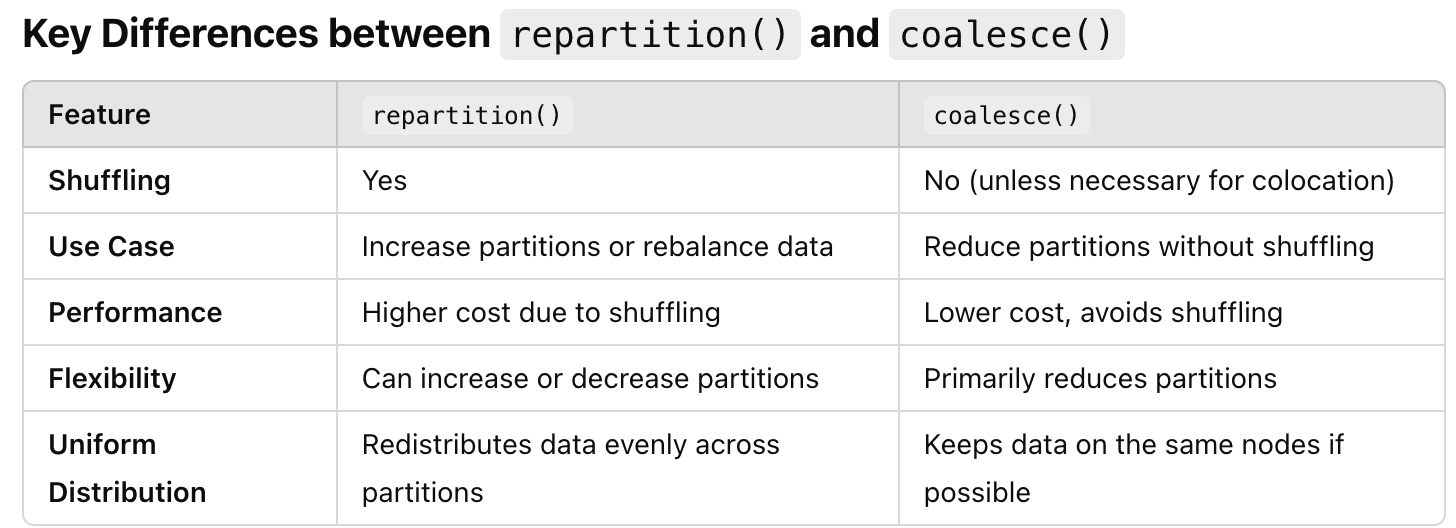

Best Practices:

Choose repartition() for evenly distributed data: When working with large datasets that need evenly distributed partitions (such as after joins or large transformations), repartition() is more suitable, despite the shuffle cost.

Use coalesce() for quick partition reduction: When you know that fewer partitions are needed (typically after filtering or as a final step before writing data), coalesce() is efficient since it avoids shuffling.

Optimize for Write Operations: If writing to storage formats like Parquet or ORC, adjusting partitions via repartition() or coalesce() can reduce the number of output files and improve read performance later on.


Summary:

In Spark, repartition() and coalesce() help in managing data partitioning by allowing flexible control over the number of partitions. repartition() provides a balanced distribution through a shuffle, suitable for increasing partitions or rebalancing data, while coalesce() efficiently reduces partitions without a full shuffle. Proper use of these functions optimizes memory use, reduces network traffic, and improves the performance of distributed data processing.



Interview Style Answer:

Partitioning refers to splitting data into smaller chunks that can be processed in parallel across the cluster. Spark tries to process each partition independently, which is a key aspect of its parallelism.

repartition(): This operation shuffles the data and creates a specified number of partitions, increasing or decreasing the number of partitions. It is expensive due to the data shuffle and should be used sparingly.

Example:

    df = df.repartition(10)


coalesce(): This operation reduces the number of partitions without shuffling data as much. It's more efficient than repartition() when you want to reduce the number of partitions, as it tries to combine adjacent partitions.

Example:

    df = df.coalesce(1)

When to use:

   - Use repartition() when you need to increase partitions (e.g., prior to a wide transformation).
   - Use coalesce() to decrease partitions (e.g., before saving data to disk).

# Q12. How would you handle real-time streaming data in Spark? What is Structured Streaming in Spark?

To handle real-time streaming data in Spark, you would use Spark Structured Streaming, a scalable and fault-tolerant stream processing engine built on the Spark SQL engine. Spark Structured Streaming provides a high-level API for processing streaming data in a way similar to handling batch data, which allows for seamless integration of batch and stream processing within the same framework.

Overview of Structured Streaming:

Structured Streaming is designed to process unbounded data streams with a focus on ease of use, reliability, and scalability. It treats streaming data as a continuous, unbounded table, where new data is appended over time. You can perform common DataFrame/Dataset operations on streaming data, such as filtering, joining, aggregating, and windowing, just as you would on batch data.

Key Concepts in Structured Streaming:

   - Event Time: The time at which events occur, which is especially important in delayed or out-of-order data scenarios.
   - Processing Time: The time at which events are processed by the engine.
   - Watermarking: Allows handling of late data by specifying how long to wait for late events based on event time.
   - Trigger: Determines when data processing should occur (e.g., every second, minute, or continuously).

How Structured Streaming Works:

Structured Streaming is based on the DataFrame API and uses the Catalyst optimizer for query optimization. It provides:

   - Declarative API: You define a query similar to batch processing using the DataFrame/Dataset API.
   - Continuous Execution: Spark runs a series of mini-batch computations over the incoming data, producing results incrementally.
   - Fault Tolerance: By default, Structured Streaming uses checkpointing and write-ahead logs to maintain fault tolerance. It recovers the last processed state upon failure and resumes from where it left off.

Example of Real-Time Data Processing with Structured Streaming:

Here’s a simple example to process streaming data from a source like Kafka:

    from pyspark.sql import SparkSession
    from pyspark.sql.functions import explode, split

    # Create a SparkSession
    spark = SparkSession.builder \
        .appName("StructuredStreamingExample") \
        .getOrCreate()

    # Define the streaming DataFrame from a source (e.g., Kafka)
    input_df = spark \
        .readStream \
        .format("kafka") \
        .option("kafka.bootstrap.servers", "localhost:9092") \
        .option("subscribe", "input_topic") \
        .load()

    # Process the data (e.g., parse JSON messages)
    processed_df = input_df.selectExpr("CAST(value AS STRING)") \
        .select(explode(split("value", " ")).alias("word")) \
        .groupBy("word") \
        .count()

    # Define the output sink
    query = processed_df \
        .writeStream \
        .outputMode("complete") \
        .format("console") \
        .start()

    query.awaitTermination()

Modes of Data Output in Structured Streaming:

When writing results to a sink, Spark Structured Streaming supports different output modes:

   - Append: Only new rows are written to the output sink (default for streams).
   - Complete: The entire result table is written to the output (e.g., useful in aggregations).
   - Update: Only rows that have changed since the last trigger are written to the sink.

Structured Streaming Architecture:

The Structured Streaming architecture involves:

   - Input Sources: Supports a range of sources like Kafka, Kinesis, and files on distributed storage (e.g., HDFS).
   - Continuous Query: The logic of the query (defined by transformations and actions on DataFrames) is continuously applied to new data.
   - Output Sinks: Results can be written to a variety of sinks, such as Kafka, databases, HDFS, or consoles.

Structured Streaming can handle both micro-batch and continuous processing. Micro-batch mode processes data in fixed intervals, while continuous processing (low-latency mode) reduces latency but is available only in specific scenarios.

Fault Tolerance in Structured Streaming

Structured Streaming achieves fault tolerance through:

   - Checkpointing: Checkpoints store the progress and state of streaming queries.
   - Write-Ahead Logs (WAL): Data is stored in a durable log before being processed, allowing for recovery in case of failure.
   - Exactly-Once Processing: Structured Streaming supports exactly-once semantics with end-to-end transaction support for specific sources and sinks, such as Kafka.

Best Practices for Optimizing Real-Time Streaming in Spark:

   - Minimize State in Stateful Operations: Windowed operations and aggregations can consume a lot of memory. Minimize the window duration or use watermarks to discard older data.
   - Tune Trigger Intervals: Configure trigger intervals based on the expected data arrival rate and the required latency.
   - Optimize Batch Size: In micro-batch mode, batch size should match the rate of incoming data to prevent excessive lag or high latency.
   - Use Watermarking for Late Data: This prevents stale data from affecting results while still allowing for some delay tolerance.
   - Leverage Kafka Offsets: In Kafka sources, use offsets to manage data ingestion accurately. Structured Streaming can remember offsets automatically if checkpointing is enabled.


Summary:

Structured Streaming in Spark allows for efficient, fault-tolerant real-time data processing by treating streaming data as a continuously growing table. Its integration with Spark SQL and the DataFrame API makes it highly expressive and user-friendly, while features like watermarking, triggers, and exactly-once processing enable handling complex real-time processing requirements.


Interview Style Answer:

Real-time streaming in Spark is handled through Structured Streaming. Structured Streaming is a high-level API in Spark that allows for continuous processing of real-time data streams. It builds on Spark SQL, using the same DataFrame and Dataset API, and provides support for both batch and stream processing.

Key Features:

   - Continuous Query: Streams are processed as a series of micro-batches, and the results are continuously updated.
   - Fault Tolerance: Spark ensures exactly-once semantics by writing intermediate results to a checkpoint.
   - Integration with sources: Supports a variety of sources like Kafka, file systems, and more.

Example:

    # Define streaming source (e.g., Kafka)
    streamingDataFrame = spark.readStream.format("kafka").option("kafka.bootstrap.servers", "localhost:9092").option("subscribe", "topic").load()

    # Define transformation
    transformedDataFrame = streamingDataFrame.selectExpr("CAST(key AS STRING)", "CAST(value AS STRING)")

    # Start the streaming query
    query = transformedDataFrame.writeStream.outputMode("append").format("console").start()

    # Wait for the query to terminate
    query.awaitTermination()
    
Structured Streaming simplifies real-time data processing and makes it similar to batch processing, allowing you to use SQL-like queries to process data streams.

# Q13. What are some common data storage formats in Big Data, and why would you choose one over another (e.g., Parquet, Avro, ORC)?

Common Data Storage Formats in Big Data:

Parquet:

   - Columnar storage format, optimized for analytics and reading specific columns.
   - Compression: Supports efficient compression.
   - Use case: Ideal for read-heavy analytics workloads in Spark and Hive, especially for large-scale data processing. It is commonly used in Data Lakes and works well with both batch and real-time processing.
  - Why choose: Excellent for performance when accessing a subset of columns due to its columnar nature.


Avro:

   - Row-based storage format, optimized for write-heavy use cases.
   - Schema Evolution: Supports schema evolution with embedded schema information.
   - Use case: Best for message-based systems and use cases that require schema versioning, such as when data is serialized in Kafka or other streaming services.
   - Why choose: Ideal for data pipelines, message queuing systems, and scenarios requiring frequent schema changes.

RC (Optimized Row Columnar):

   - Columnar storage format optimized for Hadoop ecosystem.
   - Compression and performance: Provides better compression and read performance than Parquet for certain workloads.
   - Use case: Best suited for large-scale batch processing in Hive-based workloads.
   - Why choose: It offers better read performance and compression for large datasets in Hive.

Choosing the right format:

Use Parquet or ORC for analytic workloads with large-scale data as they are highly optimized for read performance.
Use Avro when you require row-level access and need schema evolution (e.g., streaming data with Kafka).

# Q14. How do you handle data skew in Spark? What are some techniques to mitigate skew issues?

Data skew occurs when one or more partitions hold much more data than others, leading to inefficient processing and slow jobs. Some techniques to mitigate data skew in Spark include:

Salting Keys:

   - When a join or group operation results in uneven data distribution, adding a random "salt" value to the key can ensure more even partitioning.
  - Example: For a key-based join, append a random number (e.g., 0-10) to the key.

Broadcast Join:

   - If one side of the join is small enough, use broadcast joins (broadcast() function) to send the smaller dataset to all worker nodes to avoid shuffling the large dataset.
   - This reduces the shuffle and ensures that data from both sides is processed locally.

Repartitioning:

   - Repartition the dataset using repartition() or coalesce() to change the number of partitions. This can help distribute the data more evenly.

Custom Partitioning:

   - Use custom partitioning strategies to control how data is distributed across partitions based on key distribution.

Avoid Wide Transformations:

   - Reduce the use of operations like groupByKey, which can cause data to be shuffled heavily, and instead use reduceByKey or aggregateByKey to reduce the amount of data shuffled.

Skewed Join Optimization:

   - In the case of skewed joins, Spark provides the option to split the skewed key into multiple parts, performing a more balanced join.

# Q15. What is the difference between batch and stream processing in Big Data? Provide use cases for each.
Batch Processing:

   - Definition: In batch processing, data is processed in large chunks (or batches) at scheduled intervals.

   - Use case: Suitable for jobs that require processing of large amounts of historical data (e.g., ETL jobs, log aggregation, batch analytics).

   - Example: Data warehouse loading where millions of records are processed once a day.

   - Tools: Apache Hadoop, Apache Spark (batch mode).


Stream Processing:

   - Definition: Stream processing processes data in real-time as it arrives, with low-latency processing.
   - Use case: Real-time analytics, monitoring, or any use case where immediate processing of data is required.
   - Example: Fraud detection in transactions, real-time recommendation systems, and log monitoring.
   - Tools: Apache Kafka, Apache Flink, Spark Streaming, Apache Pulsar.

Difference:

   - Latency: Batch processing has higher latency (data is processed in bulk), whereas stream processing has low latency (data is processed as it arrives).
   - Use cases: Batch for historical data processing and stream for real-time data processing.

# 16. Explain how you would design a data pipeline using Spark for ETL (Extract, Transform, Load) processing.

A typical ETL pipeline using Spark would include the following steps:

Extract:

   - Read data from various source systems (e.g., relational databases, flat files, or streaming sources).
   - For batch extraction, use Spark’s spark.read.format() to load data from files or databases.
   - For real-time extraction, use Spark Streaming with sources like Kafka or socket streams.

Transform:

   - Cleanse, filter, and transform the data using Spark’s DataFrame and RDD APIs.
   - Apply various transformations like map(), filter(), groupBy(), and join() to aggregate and manipulate the data.
   - Handle schema evolution with Spark SQL if necessary.

Load:

   - Write the processed data to a target data store such as HDFS, Parquet files, a NoSQL database, or a relational database.
   - Use spark.write() to write the data in formats like Parquet, Avro, or ORC, depending on the downstream requirements.
   - Ensure data consistency using techniques like checkpointing in Spark Streaming for real-time data.



Designing a data pipeline using Apache Spark for ETL (Extract, Transform, Load) processing involves several key steps and components. Below is a detailed explanation of how to design such a pipeline, keeping in mind scalability, fault tolerance, and performance optimization.

1. Requirements Gathering and Design Overview:
 
First, clearly define the objectives of the pipeline:

   - Extract: From what sources will the data be ingested (e.g., databases, data lakes, flat files, APIs)?
   - Transform: What data transformations or business logic will be applied?
   - Load: Where will the data be loaded (e.g., data warehouse, data lake, relational database)?

Ensure that the pipeline is designed to handle large volumes of data, is fault-tolerant, and performs optimally. Spark provides the tools to process both batch and real-time data, and we'll use these tools depending on the requirements.

2. Extract (Data Ingestion):

The first step in an ETL pipeline is extracting data from different sources. Spark supports reading data from a wide variety of sources:

   - Files: CSV, Parquet, Avro, JSON, etc.
   - Databases: Relational databases (via JDBC), NoSQL databases (e.g., MongoDB, Cassandra).
   - APIs/Streams: Real-time ingestion using Structured Streaming.

Use Spark’s spark.read API to extract data from these sources:

    # Example: Extracting data from a CSV file
    df = spark.read.option("header", "true").csv("s3://bucket-name/data/*.csv")

    # Example: Extracting data from a JDBC source
    df = spark.read.format("jdbc").option("url", jdbc_url).option("dbtable", "table_name").load()

For real-time data, Spark Structured Streaming can be used to ingest streaming data from sources like Kafka, file systems, or sockets.


    # Example: Streaming from Kafka
    streaming_df = spark.readStream.format("kafka").option("kafka.bootstrap.servers", "localhost:9092").option("subscribe", "topic_name").load()


3. Transform (Data Processing):

Once the data is extracted, the next step is the transform phase, where we clean, filter, aggregate, and apply business logic.

Common Transformations:

Filtering: Remove unwanted data based on certain conditions.

    df_filtered = df.filter(df["age"] > 18)

Aggregations: Perform summarization operations like count, sum, avg, etc.

    df_aggregated = df.groupBy("country").agg({"sales": "sum", "age": "avg"})

Joins: Combine data from multiple sources.

    df_joined = df1.join(df2, df1.id == df2.id, "inner")

Type Casting: Ensure the right data types are used.

    df = df.withColumn("amount", df["amount"].cast("double"))

Window Functions: Compute aggregations over a sliding window.

    from pyspark.sql.window import Window
    windowSpec = Window.partitionBy("country").orderBy("date")
    df_with_rank = df.withColumn("rank", rank().over(windowSpec))

Data Enrichment: Use external data sources or apply business rules to enrich the dataset.

Data Quality & Validation:

   - Perform data validation and quality checks:

   - Check for missing values.

   - Remove duplicate records.


    df_no_duplicates = df.dropDuplicates()

Apply business validation rules to ensure the data conforms to the required standards.

Handling Errors and Fault Tolerance:

    - Use try-except blocks for error handling during transformations to catch and log any issues.
    - For real-time processing, use checkpointing in Structured Streaming to ensure fault tolerance.

4. Load (Data Output):

The final step in the ETL pipeline is loading the transformed data into the desired destination. Spark supports various output formats, including databases, file systems, and cloud storage.

Writing to a File System (e.g., HDFS, S3, local):

df.write.format("parquet").save("s3://bucket-name/output/")

Writing to a Database (via JDBC):

    df.write.jdbc(url=jdbc_url, table="destination_table", mode="overwrite")

Writing to a Data Warehouse (e.g., Snowflake, RedShift, BigQuery):

 df.write.format("snowflake").options(**sfOptions).save()

For real-time streaming, you will typically write to a Kafka topic, a file system, or a database:

    # Example: Writing stream data to a Kafka topic
    query = streaming_df.writeStream.format("kafka").option("kafka.bootstrap.servers", "localhost:9092").option("topic", "output_topic").start()

Data Partitioning and Optimization:

Partitioning the data helps improve read and write performance. Partitioning can be done based on columns that are frequently queried.

    df.write.partitionBy("country").format("parquet").save("s3://bucket-name/output/")

Bucketing is another optimization technique, especially when performing joins or aggregations on large datasets.

Handling Data Consistency and Transactions:
   - If necessary, Spark provides options for exactly-once semantics in streaming applications to ensure consistency.

5. Optimizing Spark Jobs for Performance:

When designing Spark-based ETL pipelines, performance optimization is crucial to ensure scalability and efficiency:

Caching and persisting intermediate datasets when they are reused multiple times.

Tuning Spark configurations: Adjust configurations for memory management, shuffle operations, and task parallelism based on the size of the data and cluster resources.

Minimizing Shuffles: Repartitioning or coalescing data appropriately to minimize expensive shuffle operations.

Broadcast Joins: Use broadcast joins when joining a large dataset with a small one to avoid unnecessary shuffling.

    df_large.join(broadcast(df_small), "id")

Avoid wide transformations like groupByKey which require expensive shuffles. Use reduceByKey for more efficient aggregation.

6. Orchestration & Scheduling:

To automate and manage the pipeline, use a workflow orchestration tool like Apache Airflow, Oozie, or Luigi. These tools help:

   - Schedule jobs at specific intervals.
   - Monitor and retry failed jobs.
   - Alert on failures and performance issues.

For example, an Airflow DAG (Directed Acyclic Graph) might look like this:


    from airflow import DAG
    from airflow.operators.python import PythonOperator
    from pyspark.sql import SparkSession

    def extract_transform_load():
        spark = SparkSession.builder.appName("ETL_Pipeline").getOrCreate()
        df = spark.read.csv("input_data.csv")
        transformed_df = df.filter(df["age"] > 18).groupBy("country").agg({"sales": "sum"})
        transformed_df.write.parquet("output_data.parquet")

    dag = DAG('ETL_Pipeline', default_args=default_args, schedule_interval='@daily')
    etl_task = PythonOperator(task_id='extract_transform_load', python_callable=extract_transform_load, dag=dag)

7. Monitoring and Logging:

Effective monitoring and logging are critical for production pipelines:

   - Use Spark UI and logs for troubleshooting and performance monitoring.
   - Set up metrics and alerts (e.g., Spark history server, Prometheus + Grafana) to monitor job progress, data quality, and resource utilization.


Summary of the ETL Pipeline Steps:

   1. Extract data from various sources (files, databases, APIs, streams).
   2. Transform the data through cleaning, validation, enrichment, and business logic.
   3. Load the transformed data into the destination storage (data warehouse, data lake, etc.).
   4. Optimize for performance (partitioning, caching, minimizing shuffles).
   5. Orchestrate and schedule using tools like Airflow.
   6. Monitor and log job progress and errors.

By leveraging Spark’s distributed processing, fault tolerance, and optimization capabilities, you can build scalable, reliable, and efficient ETL pipelines that handle large volumes of data in batch or real-time scenarios.

# Q17.  How does Spark handle joins? What are the different types of joins in Spark, and how do you optimize them?

Spark supports the following types of joins:

   - Inner Join: Returns rows where there is a match in both datasets.
   - Left Outer Join: Returns all rows from the left dataset, with matching rows from the right dataset; non-matching rows from the right are filled with null.
   - Right Outer Join: Similar to left outer join but includes all rows from the right dataset.
   - Full Outer Join: Includes all rows from both datasets, with null values where there is no match.
   - Cross Join: Returns the Cartesian product of both datasets.
   - Self Join: A join on the same dataset.


Optimization Techniques:

   - Broadcast Join: Use a broadcast join when one side of the join is much smaller than the other, preventing a shuffle.
   - Bucketing: Bucketing helps pre-partition the data in a way that makes joins more efficient.
   - Avoid Shuffle: Use reduceByKey instead of groupByKey to minimize the shuffle size.
   - Caching: Cache the RDDs or DataFrames involved in multiple stages of the join if they are reused.
   - Partitioning: Repartition data based on the join key to optimize the distribution of data across executors.


# Q18. What is a shuffle in Spark? How does it impact performance, and how can it be optimized?

Shuffle in Spark refers to the process of redistributing data across partitions during operations like groupBy, join, reduceByKey, etc.
 It is a costly operation that involves:

   - Disk I/O: Data may be written to disk temporarily during shuffle.
   - Network I/O: Data is sent over the network between nodes.
   - Memory consumption: Spark has to keep large intermediate datasets in memory.

Impact on performance:

   - Shuffling can cause high network traffic, disk I/O, and memory usage, leading to performance bottlenecks.
   - It can also introduce data skew, where certain partitions hold significantly more data than others.

Optimization:

   - Minimize shuffles: Use operations like map(), flatMap() to avoid wide transformations that result in shuffles.
   - Coalesce: Use coalesce() to reduce the number of partitions after a shuffle operation.
   - Broadcast Joins: When one dataset is small, use a broadcast join to avoid shuffling.
   - Partitioning: Repartition data before a shuffle to evenly distribute the load.

# Q19. How does Spark handle large datasets that do not fit in memory?

When datasets do not fit in memory, Spark utilizes the following strategies:

   1. Spilling to disk: Spark can spill data to disk when there is insufficient memory (i.e., when data exceeds available RAM). This is managed by the StorageLevel configuration.

   2. Caching and Persistence: For datasets that are reused multiple times, Spark can cache or persist them on disk if they do not fit entirely in memory.

   3. Partitioning: By repartitioning data into smaller chunks, Spark can reduce the memory pressure on each individual executor.

   4. Compression: Using compression formats like Parquet and ORC can reduce the memory footprint.

   5. Dynamic Memory Management: Spark has a dynamic memory management system that allocates memory for execution and storage dynamically, based on the task requirements.

# Q20. What is a broadcast variable in Spark? How can it improve the efficiency of joins?

Broadcast Variables in Spark are read-only variables that are cached and distributed to all nodes in the cluster. These variables are broadcast to every worker node, which avoids the need to send large datasets over the network multiple times. They are particularly useful for small lookup tables that need to be used by all worker nodes in operations like joins.

How they improve the efficiency of joins:

In a join: If one of the datasets (e.g., a small lookup table) is broadcasted, Spark will send that dataset to all worker nodes only once, rather than shuffling the data across nodes during each join. This can significantly reduce network I/O and shuffling overhead.

Example: If you are joining a large dataset with a small one, you can broadcast the small dataset so that it resides in memory on each executor. This results in fewer shuffles and improves performance.

Usage:

small_df = spark.read.parquet("small_dataset.parquet")
broadcasted_df = broadcast(small_df)
result = large_df.join(broadcasted_df, large_df.id == broadcasted_df.id)

# Q21. Explain the purpose of accumulator variables in Spark. How are they different from broadcast variables?

Accumulator Variables in Spark are variables used for aggregating information across multiple tasks. They are primarily used for debugging and monitoring purposes, and they allow you to track the progress of Spark jobs or accumulate results across the tasks in a distributed manner.

   - Behavior: Accumulators are write-only for tasks, meaning only workers can update the accumulator, but only the driver can read it. This ensures they are only used for aggregating data like counters or sums during computation.

   - Common Use Case: Counting the number of error messages or how many tasks have been processed in the Spark job.

Difference from Broadcast Variables:

   - Broadcast Variables are read-only and are used to distribute small data to all workers, whereas Accumulators are used for aggregating information across tasks during job execution.
   - Broadcast Variables are for data sharing across tasks, whereas Accumulators are for data collection or accumulating sums, counts, or error logs.

Example (Accumulator):

    from pyspark import AccumulatorParam
    acc = sc.accumulator(0)

    def add_one(x):
        acc.add(1)
        return x

    rdd = sc.parallelize([1, 2, 3, 4])
    rdd.foreach(add_one)

    print(acc.value)  # Output: 4

# Q22. How would you set the number of partitions in Spark for optimal performance?

The optimal number of partitions in Spark depends on the size of the data, the available resources (memory and cores), and the type of computation being performed. A general guideline is to:

Set the Number of Partitions Based on Data Size:

The number of partitions should be proportional to the size of the data and the number of available executor cores. A good starting point is:

num_partitions = (size_of_data_in_gb * 1024) / (size_of_data_per_partition_in_mb)

For example, with 100 GB of data, if each partition holds 128 MB, you might create around 800 partitions.

Use repartition() to increase the number of partitions:

If the data is too large, use repartition() to distribute the data across more partitions.

rdd = rdd.repartition(100)  # Repartition the RDD to 100 partitions

Use coalesce() to reduce the number of partitions:

After wide transformations like joins, you can use coalesce() to reduce the number of partitions and avoid unnecessary shuffling.

    rdd = rdd.coalesce(50)  # Reduce partitions after the transformation

Consider Resource Availability:

Ensure that the number of partitions aligns with the number of available executor cores. A common practice is to have around 2-3 partitions per core.

Example: If you have 100 cores, having around 200-300 partitions can lead to efficient parallel processing.



# Q23. What are Tungsten and Catalyst optimizers in Spark, and how do they improve Spark performance?

Catalyst Optimizer:

   - Purpose: Catalyst is a query optimizer in Spark SQL. It uses a rule-based and cost-based optimization approach to improve the efficiency of queries in Spark SQL.
 
   - How it improves performance: It optimizes logical and physical query plans by applying transformation rules such as predicate pushdown, constant folding, and column pruning.

   - Example: It can automatically optimize WHERE clauses to filter data as early as possible, thus reducing unnecessary processing.


Tungsten Optimizer:

   - Purpose: Tungsten is a Spark SQL execution engine that focuses on optimizing memory management and code generation to improve the performance of Spark jobs.

   - How it improves performance: Tungsten improves the performance of Spark jobs through:
      - Off-heap memory management: Allocating memory outside the JVM heap to avoid garbage collection overhead.
      - Code generation: Generating Java bytecode at runtime for complex operations, thus eliminating the overhead of reflection and increasing execution speed.
      - Whole-stage code generation: Combines multiple physical operations into a single stage, reducing the number of passes over the data.

# Q24. How do you monitor Spark jobs, and what tools can you use to identify issues with Spark applications?

Monitoring and identifying issues in Spark applications can be done using the following tools:

Spark UI:

Provides detailed information on the stages, tasks, and jobs in your Spark application. You can use the Spark Web UI (usually available at http://<driver-node>:4040) to monitor:

   - Job and Stage-level progress
   - Task metrics (e.g., duration, input/output size, shuffle size)
   - Executor memory usage

Ganglia/Prometheus:

   - Tools like Ganglia or Prometheus can be used for cluster monitoring. These provide insights into the overall health of the cluster, including memory usage, CPU usage, and other system metrics.

Logging:

   - Enable Spark logging at different levels (INFO, DEBUG) for detailed logs. This helps track issues like task failures, shuffle problems, and memory errors.

Metrics and Alerts:

   - Use Spark’s built-in metrics system to track job performance and set up alerts for things like excessive memory usage or task failures.

Spark History Server:

   - The Spark History Server allows you to review the logs and execution plans of completed jobs. This is particularly useful for debugging failed or slow jobs

# Q25. Explain the impact of serialization on Spark performance. How do you choose between Java and Kryo serialization?

Serialization in Spark is the process of converting objects into a format that can be stored or transmitted over the network (e.g., for shuffling). The choice of serialization format significantly impacts the performance of Spark jobs, especially in large-scale distributed systems.

Impact of Serialization:

   - Serialization Overhead: More complex serialization formats (e.g., Java serialization) tend to be slower and generate larger data sizes, increasing both CPU and network overhead.
   - Network I/O: Serialized data has to be transferred over the network, so the choice of serialization affects the size and speed of data transfer.
   - Memory Efficiency: Serialization directly impacts how much memory is used in the cluster, as more compact formats reduce memory overhead.
J
ava Serialization:

   - Pros: It is the default serialization mechanism in Spark, but it is slow and produces larger serialized data.
   - Use Case: Java serialization should be avoided when performance is critical.

Kryo Serialization:

   - Pros: Faster and more compact than Java serialization. Kryo is highly efficient and is used when Spark performance is a priority.
   - Use Case: Recommended for high-performance Spark jobs. It is ideal when dealing with large datasets or complex objects that need to be transferred across nodes.

Configuring Kryo Serialization:

    spark.conf.set("spark.serializer", "org.apache.spark.serializer.KryoSerializer")
    spark.conf.set("spark.kryo.registrationRequired", "true")  # Enable registration of classes

When to choose Kryo:

If you need better performance, especially when dealing with large datasets or custom objects, Kryo is the preferred choice over Java serialization.

# Scenario based questions and answers

# Q26. How would you design a system to process and store logs from millions of devices in real-time?

Designing a system to process and store logs from millions of devices in real-time involves several steps, focusing on scalability, fault tolerance, and low-latency processing. Here’s how I would approach it:

Components:

1. Data Ingestion:

   - Use Apache Kafka or Amazon Kinesis to ingest log data from millions of devices. Kafka provides high-throughput, fault-tolerant messaging and can handle high ingestion rates.

2. Stream Processing:

   - For processing real-time logs, use Apache Spark Structured Streaming. This allows us to process the logs in micro-batches or continuously and supports exactly-once semantics.

3. Data Storage:

   - For storing logs efficiently, use HDFS, Amazon S3, or Azure Data Lake. These distributed storage systems can handle large volumes of log data.
   - Elasticsearch can also be used for efficient full-text search queries on logs.

4. Data Aggregation and Transformation:

   - Use Spark to aggregate and process logs (e.g., counting errors, summarizing logs per device, etc.) before storing them in storage systems.

5. Data Querying:

   - For real-time querying and dashboarding, use Apache Druid or Elasticsearch to allow fast querying on time-series log data.

6. Monitoring and Alerting:

   - Use Prometheus or Grafana for monitoring the health of the pipeline and setting up alerts for any anomalies.

Key Considerations:

   - Scalability: The system should horizontally scale by adding more Kafka brokers and Spark executors.
   - Fault Tolerance: Kafka guarantees data durability. Spark Structured Streaming ensures exactly-once processing.
   - Latency: Minimize latency by tuning Kafka and Spark configurations, ensuring low-latency data processing and storage.

# Q27. Describe a solution for efficiently storing and querying petabytes of structured and semi-structured data.
For storing and querying petabytes of structured and semi-structured data, the solution should involve both storage optimization and efficient query mechanisms.

1. Data Storage:
  
   - Use a Data Lake (e.g., Amazon S3, Azure Data Lake, HDFS) to store raw data. A data lake can store both structured (e.g., tables, Parquet files) and semi-structured data (e.g., JSON, Avro).
   - For structured data (tables), use columnar storage formats like Parquet or ORC, as they allow efficient querying and compression.
   - For semi-structured data, JSON or Avro are ideal because they are flexible and schema-less, which allows you to store data without enforcing a strict schema.

2. Data Querying:

   - Use Apache Spark or Presto for distributed querying over the data stored in the data lake. These tools can read data from S3/HDFS and perform SQL queries on it.
   - For fast querying, build data warehouses (e.g., Amazon Redshift, Google BigQuery, Azure Synapse Analytics) on top of the data lake for structured data that needs high-performance analytics.

3. Optimization:
   - Partition large datasets by logical keys (e.g., date, region) to optimize query performance.
   - Use indexes (e.g., Hive indexing) and materialized views for frequently queried data.
   - Implement data caching and result materialization to speed up repetitive queries.

# Q28. How would you handle schema evolution in a data pipeline?
Schema evolution is critical for handling changes in the data structure over time without breaking existing processes. Here's how I would handle it:

Approach:

   - Use Apache Avro or Apache Parquet, as both formats support schema evolution natively. These formats store the schema alongside the data, which allows new schema versions to be added without breaking compatibility.

   - Versioning: Maintain different schema versions over time. Each time the schema changes (e.g., adding/removing fields), ensure the schema is backward-compatible.

   - Schema Registry: Implement a Schema Registry (e.g., Confluent Schema Registry) to centrally manage and enforce schema versions for both producers and consumers.

   - Data Transformation: In the pipeline, use tools like Apache Spark to handle schema evolution during ETL. For example, during the "transform" stage, map old fields to new ones if the schema has changed.

Best Practices:

   - Use backward-compatible changes (e.g., adding new fields with default values).
   - Keep track of schema versions and validate incoming data against the schema.
   - Write transformation logic to accommodate the evolving schema, such as filling in missing fields with default values.


# Q29. Suppose you have a data pipeline that is becoming slower as data volume grows. What steps would you take to identify bottlenecks and optimize it?
To optimize a data pipeline as it slows down due to increased data volume:

Steps to Identify Bottlenecks:

1. Profiling the Pipeline:

   - Use Spark UI to track the execution time of jobs, stages, and tasks.
   - Identify long-running stages, skewed tasks, or excessive shuffling.

2. Monitoring Resource Utilization:

   - Use tools like Prometheus and Grafana to monitor CPU, memory, and disk I/O usage on the cluster.
   - Check if the cluster has enough resources (e.g., memory, CPU) or if there is resource contention.

Steps to Optimize:

1. Data Partitioning:

   - Repartition data to minimize shuffling and optimize parallelism.
   - Use repartition() or coalesce() to adjust the number of partitions.

2. Caching:

   - Cache intermediate results that are reused multiple times.
   - Use persist() to store datasets in memory, which speeds up further operations.

3. Data Serialization:

   - Optimize data serialization formats, such as using Kryo serialization for Spark, which is faster and more memory-efficient than Java serialization.

4. Adjusting Spark Configurations:

   - Tune Spark configurations (e.g., spark.sql.shuffle.partitions, spark.executor.memory, spark.driver.memory).
   - Use broadcast joins to avoid large shuffles when joining small datasets with large ones.

5. Optimize Queries:

   - Rewrite complex queries and avoid wide transformations like groupByKey.
   - Use reduceByKey or aggregateByKey instead of groupByKey for better performance.

# Q30. Explain how you would implement a deduplication process in Spark for a dataset containing billions of records.

To implement a deduplication process in Spark:

Steps:

1. Identify Key Columns: Define which columns uniquely identify a record (e.g., user_id, event_id).

2. Sort and Deduplicate:

   - Use dropDuplicates() to remove duplicate rows based on the key columns:

    df_dedup = df.dropDuplicates(["user_id", "event_id"])

3. Using Window Functions:

   - For more advanced deduplication (e.g., keeping the latest record based on a timestamp), use window functions.

    from pyspark.sql.window import Window
    windowSpec = Window.partitionBy("user_id").orderBy(df.timestamp.desc())
    df_dedup = df.withColumn("rank", rank().over(windowSpec)).filter(df.rank == 1)

4. Optimize Shuffling:

   - Use partitioning to reduce shuffling when working with large datasets:

    df_dedup = df.repartition("user_id").dropDuplicates()

5. Avoiding Skew: Ensure that the data is evenly distributed across partitions to prevent skew during the deduplication process. This can be achieved by fine-tuning partitioning strategies or using salting.



# Q31. You have been given a dataset that is growing in size daily. Describe your approach to processing it incrementally.

To process a growing dataset incrementally, I would use incremental data processing techniques:

Steps:

1. Identify New Data:

   - Use timestamp-based filtering (e.g., process data where the timestamp is after the last processed timestamp).
   - Alternatively, use a change data capture (CDC) approach if available, to track changes at the source.

2. Use Structured Streaming:

   - If data arrives in real-time (e.g., in Kafka or a file system), use Spark Structured Streaming for continuous processing.
   - The streaming job will process new records as they arrive and update the result incrementally.

3. Batch Processing with Delta Lake:

   - Use Delta Lake on top of a data lake for ACID transactions and to handle incremental loads effectively.
   - Merge new data with the existing dataset using Delta's upsert functionality to keep the dataset up-to-date.

4. Storing Processed Data:

   - Store processed data in partitioned tables or files to avoid reprocessing the entire dataset. For example, partition by date or another logical key.

    df.write.partitionBy("date").parquet("output_path")

# Q32. Describe how you would integrate Spark with a data warehouse like Hive or a database like HBase.

Spark and Hive Integration:

1. Spark-Hive Integration:

   - Spark can read from and write to Hive using the HiveContext (or SparkSession in newer versions).
   - Enable Hive support when initializing the SparkSession:

    spark = SparkSession.builder.enableHiveSupport().getOrCreate()

2. Reading from Hive:

   - Use Spark’s built-in support for Hive to query and analyze data directly:

    df = spark.sql("SELECT * FROM hive_table")


Spark and HBase Integration:

1. HBase Connector:

   - Use the HBase Spark connector to read and write data to HBase.
   - Define an HBase configuration and use it in your Spark job:

    df = spark.read.option("hbase.columns.mapping", "column_mapping").format("org.apache.hadoop.hbase.spark").load()

2. Writing to HBase:

   - Similarly, use the connector to write processed data back to HBase.

    df.write.format("org.apache.hadoop.hbase.spark").save()

# Q33. What is a data lake, and how does it differ from a traditional data warehouse?

A data lake is a centralized repository that allows you to store both structured and unstructured data at scale. It stores raw data in its native format, enabling flexibility for a variety of use cases like machine learning, analytics, and big data processing.

Key Differences:

1. Storage Type:

   - Data Lake: Stores raw, unprocessed data in any format (JSON, CSV, images, etc.).
   - Data Warehouse: Stores structured data in predefined schemas (tables).

2. Flexibility:

   - Data Lake: Highly flexible; can store any type of data, enabling real-time analytics, machine learning, etc.
   - Data Warehouse: Structured and optimized for OLAP workloads, like querying predefined datasets.

3. Schema:

   - Data Lake: Schema-on-read (schema is applied when the data is read).
   - Data Warehouse: Schema-on-write (data must conform to a predefined schema before being written).

4. Use Case:

   - Data Lake: Suitable for big data analytics, machine learning, and unstructured data.
   - Data Warehouse: Suitable for business intelligence and reporting on structured data.